## Bike Rental Prediction with ANN

This project uses linear regression model to predict bike reantal rate based on weather and holiday information. The dataset contains hourly count of public bikes rented in Seoul Bike Sharing System, along with the corresponding weather data and holidays information, and is available at: https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
# reading feature-engineered saved data file
df = pd.read_pickle('data_feat_eng.pkl')

In [3]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Year,No Holiday,Funct_Day
0,254,0,-5.2,37,2.2,2000,-17.6,0,0,0,12,0,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0,0,0,12,0,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0,0,0,12,0,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0,0,0,12,0,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0,0,0,12,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   int64  
 8   Rainfall(mm)               8760 non-null   int64  
 9   Snowfall (cm)              8760 non-null   int64  
 10  Month                      8760 non-null   int64  
 11  Year                       8760 non-null   int64  
 12  No Holiday                 8760 non-null   uint8  
 13  Funct_Day                  8760 non-null   uint8

There are 13 numerical features

### Train-Test Splitting of Data

In [5]:
# features and labels are singled out of the dataframe

X = df.drop(['Rented Bike Count'],axis=1)
y = df['Rented Bike Count']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Data pre-processing

Pairwise correlation of features, if high, may suggest throwing away some of the features

Text(0.5, 1.0, 'Pairwise Correlation of Featues')

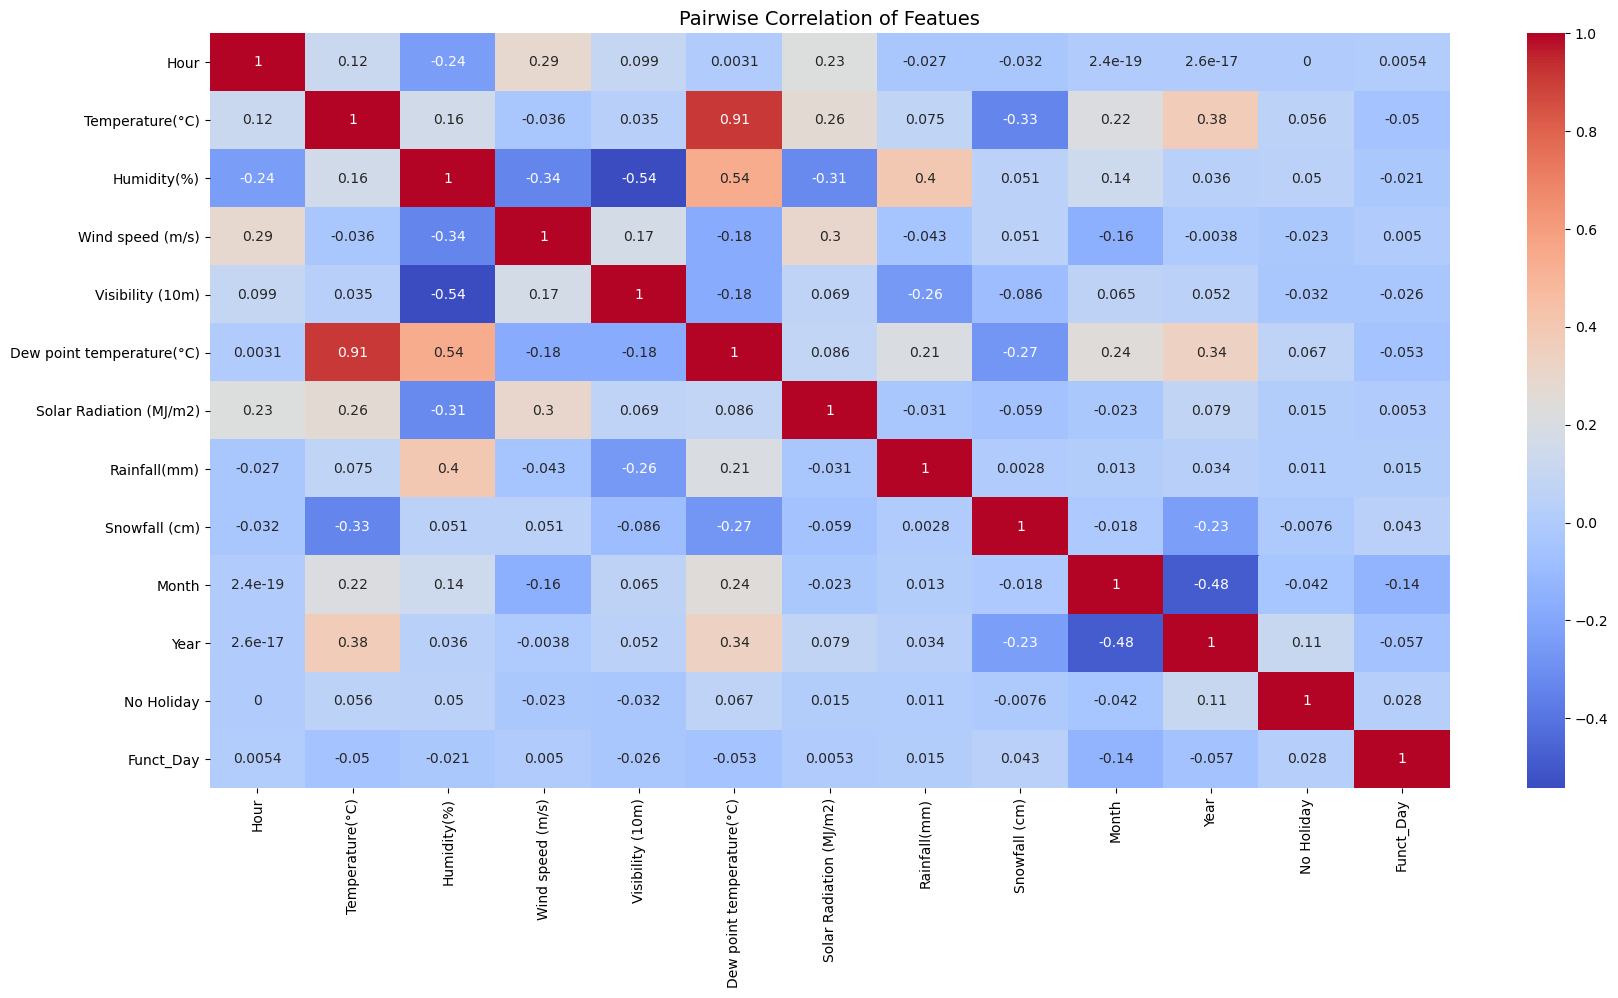

In [6]:
# pairwise correlation of featues
plt.figure(figsize=(20,10),dpi=100)
sns.heatmap(X.corr(),cmap='coolwarm',annot=True)
plt.title('Pairwise Correlation of Featues', fontsize=14)

There is a single highly correlated pair. We may need to perform PCA

#### Principal Component Analysis

In [7]:
from sklearn.preprocessing import MinMaxScaler

# feature scaling
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

To see how many principal components may be needed, let us plot cumulative explained variance

Text(0, 0.5, 'Cumulative explained variance')

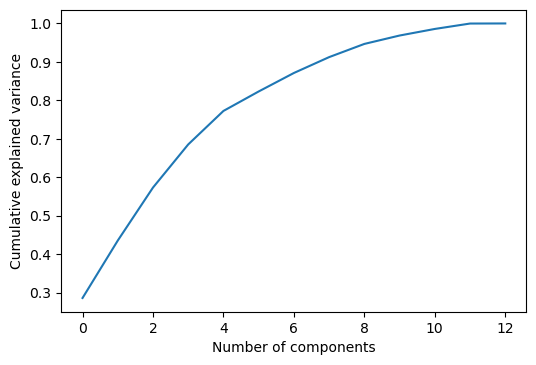

In [8]:
from sklearn.decomposition import PCA

# making the list of cumulative explained variance
pca = PCA().fit(X_train)
cumsum_list = pca.explained_variance_ratio_.cumsum()

# making the screeplot
plt.figure(dpi=100)
plt.plot(cumsum_list)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

We will retain as many principal components as account for 99% cumulative variance:

In [9]:
pc_model = PCA(n_components=0.99, svd_solver='full')
pc_model.fit(X_train)
pc_model.n_components_ 

12

In [10]:
X_train = pc_model.fit_transform(X_train)
X_test = pc_model.transform(X_test)

This rids of one more feature

### Creating the Model

In [11]:
# import tensorflow and check version
import tensorflow as tf
tf.__version__

'2.4.1'

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [13]:
def create_ann():
    '''This function creates an ANN model'''
    
    # start neural network
    model = Sequential()
    
    model.add(Dense(12, activation='relu')) # input layer
    
    model.add(Dense(12, activation='relu')) # first hidden layer
    
    model.add(Dense(12, activation='relu')) # second hidden layer
    
    model.add(Dense(1))                    # output layer
    
    # compile neural network
    opt = tf.keras.optimizers.Adam(learning_rate=0.01) # default learning_rate = 0.001
    model.compile(optimizer=opt,loss='mae')
    
    # return compiled network
    return model

In [14]:
ann = create_ann()

In [15]:
import time
t1 = time.time()

# training the model
ann.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=128, epochs=10_000)

t2 = time.time()

Epoch 1/10000
50/50 [==============================] - 2s 25ms/step - loss: 681.8915 - val_loss: 538.6337
Epoch 2/10000
50/50 [==============================] - 0s 2ms/step - loss: 447.7678 - val_loss: 293.0430
Epoch 3/10000
50/50 [==============================] - 0s 2ms/step - loss: 281.0441 - val_loss: 267.3688
Epoch 4/10000
50/50 [==============================] - 0s 2ms/step - loss: 268.2540 - val_loss: 261.0134
Epoch 5/10000
50/50 [==============================] - 0s 2ms/step - loss: 259.8493 - val_loss: 258.5748
Epoch 6/10000
50/50 [==============================] - 0s 1ms/step - loss: 255.2942 - val_loss: 254.8033
Epoch 7/10000
50/50 [==============================] - 0s 2ms/step - loss: 248.1393 - val_loss: 256.8272
Epoch 8/10000
50/50 [==============================] - 0s 1ms/step - loss: 256.9578 - val_loss: 253.0459
Epoch 9/10000
50/50 [==============================] - 0s 1ms/step - loss: 248.5689 - val_loss: 251.6837
Epoch 10/10000
50/50 [==============================] 

Epoch 78/10000
50/50 [==============================] - 0s 2ms/step - loss: 182.6687 - val_loss: 175.4806
Epoch 79/10000
50/50 [==============================] - 0s 2ms/step - loss: 176.5424 - val_loss: 174.6254
Epoch 80/10000
50/50 [==============================] - 0s 2ms/step - loss: 177.4677 - val_loss: 174.8043
Epoch 81/10000
50/50 [==============================] - 0s 2ms/step - loss: 178.2451 - val_loss: 173.8039
Epoch 82/10000
50/50 [==============================] - 0s 2ms/step - loss: 181.1101 - val_loss: 172.7557
Epoch 83/10000
50/50 [==============================] - 0s 2ms/step - loss: 175.8570 - val_loss: 176.2038
Epoch 84/10000
50/50 [==============================] - 0s 2ms/step - loss: 177.8249 - val_loss: 173.4014
Epoch 85/10000
50/50 [==============================] - 0s 2ms/step - loss: 180.0149 - val_loss: 174.4252
Epoch 86/10000
50/50 [==============================] - 0s 2ms/step - loss: 177.5216 - val_loss: 173.1641
Epoch 87/10000
50/50 [========================

Epoch 155/10000
50/50 [==============================] - 0s 2ms/step - loss: 173.0468 - val_loss: 164.9240
Epoch 156/10000
50/50 [==============================] - 0s 3ms/step - loss: 171.4212 - val_loss: 167.6153
Epoch 157/10000
50/50 [==============================] - 0s 3ms/step - loss: 164.0491 - val_loss: 165.6608
Epoch 158/10000
50/50 [==============================] - 0s 3ms/step - loss: 166.3348 - val_loss: 165.4033
Epoch 159/10000
50/50 [==============================] - 0s 3ms/step - loss: 175.0797 - val_loss: 167.3145
Epoch 160/10000
50/50 [==============================] - 0s 3ms/step - loss: 166.4936 - val_loss: 167.0681
Epoch 161/10000
50/50 [==============================] - 0s 2ms/step - loss: 169.9559 - val_loss: 165.0495
Epoch 162/10000
50/50 [==============================] - 0s 2ms/step - loss: 170.3590 - val_loss: 165.8001
Epoch 163/10000
50/50 [==============================] - 0s 3ms/step - loss: 165.2219 - val_loss: 165.2652
Epoch 164/10000
50/50 [==============

50/50 [==============================] - 0s 3ms/step - loss: 159.3105 - val_loss: 152.3088
Epoch 232/10000
50/50 [==============================] - 0s 3ms/step - loss: 154.0365 - val_loss: 153.3685
Epoch 233/10000
50/50 [==============================] - 0s 3ms/step - loss: 157.5003 - val_loss: 151.7223
Epoch 234/10000
50/50 [==============================] - 0s 3ms/step - loss: 159.1456 - val_loss: 150.9698
Epoch 235/10000
50/50 [==============================] - 0s 2ms/step - loss: 157.0741 - val_loss: 150.8808
Epoch 236/10000
50/50 [==============================] - 0s 3ms/step - loss: 157.7815 - val_loss: 152.4262
Epoch 237/10000
50/50 [==============================] - 0s 3ms/step - loss: 161.7949 - val_loss: 151.6750
Epoch 238/10000
50/50 [==============================] - 0s 3ms/step - loss: 152.8352 - val_loss: 152.5909
Epoch 239/10000
50/50 [==============================] - 0s 3ms/step - loss: 158.8756 - val_loss: 153.2763
Epoch 240/10000
50/50 [==============================

50/50 [==============================] - 0s 3ms/step - loss: 154.2025 - val_loss: 150.4349
Epoch 308/10000
50/50 [==============================] - 0s 3ms/step - loss: 153.3717 - val_loss: 148.3803
Epoch 309/10000
50/50 [==============================] - 0s 3ms/step - loss: 158.2144 - val_loss: 149.1615
Epoch 310/10000
50/50 [==============================] - 0s 3ms/step - loss: 153.4363 - val_loss: 149.3969
Epoch 311/10000
50/50 [==============================] - 0s 3ms/step - loss: 157.6133 - val_loss: 156.5998
Epoch 312/10000
50/50 [==============================] - 0s 3ms/step - loss: 158.0103 - val_loss: 150.9602
Epoch 313/10000
50/50 [==============================] - 0s 3ms/step - loss: 155.7222 - val_loss: 149.4536
Epoch 314/10000
50/50 [==============================] - 0s 3ms/step - loss: 153.6685 - val_loss: 149.4134
Epoch 315/10000
50/50 [==============================] - 0s 3ms/step - loss: 157.3389 - val_loss: 149.9833
Epoch 316/10000
50/50 [==============================

50/50 [==============================] - 0s 3ms/step - loss: 149.6634 - val_loss: 149.6843
Epoch 384/10000
50/50 [==============================] - 0s 3ms/step - loss: 153.6614 - val_loss: 153.0759
Epoch 385/10000
50/50 [==============================] - 0s 3ms/step - loss: 149.9587 - val_loss: 150.3013
Epoch 386/10000
50/50 [==============================] - 0s 4ms/step - loss: 153.4310 - val_loss: 148.5765
Epoch 387/10000
50/50 [==============================] - 0s 4ms/step - loss: 153.3450 - val_loss: 152.2671
Epoch 388/10000
50/50 [==============================] - 0s 4ms/step - loss: 158.7796 - val_loss: 150.4837
Epoch 389/10000
50/50 [==============================] - 0s 5ms/step - loss: 152.9664 - val_loss: 151.4797
Epoch 390/10000
50/50 [==============================] - 0s 5ms/step - loss: 157.3307 - val_loss: 150.4947
Epoch 391/10000
50/50 [==============================] - 0s 4ms/step - loss: 154.6495 - val_loss: 149.3451
Epoch 392/10000
50/50 [==============================

50/50 [==============================] - 0s 4ms/step - loss: 153.9595 - val_loss: 148.7588
Epoch 460/10000
50/50 [==============================] - 0s 4ms/step - loss: 149.7991 - val_loss: 151.7698
Epoch 461/10000
50/50 [==============================] - 0s 4ms/step - loss: 156.9694 - val_loss: 149.4286
Epoch 462/10000
50/50 [==============================] - 0s 4ms/step - loss: 153.3911 - val_loss: 148.9912
Epoch 463/10000
50/50 [==============================] - 0s 4ms/step - loss: 152.1922 - val_loss: 150.0988
Epoch 464/10000
50/50 [==============================] - 0s 4ms/step - loss: 150.7805 - val_loss: 148.1716
Epoch 465/10000
50/50 [==============================] - 0s 4ms/step - loss: 147.5542 - val_loss: 149.5989
Epoch 466/10000
50/50 [==============================] - 0s 4ms/step - loss: 154.8872 - val_loss: 150.3499
Epoch 467/10000
50/50 [==============================] - 0s 4ms/step - loss: 151.9129 - val_loss: 152.1629
Epoch 468/10000
50/50 [==============================

50/50 [==============================] - 0s 3ms/step - loss: 149.7429 - val_loss: 150.1482
Epoch 536/10000
50/50 [==============================] - 0s 3ms/step - loss: 152.2862 - val_loss: 148.6136
Epoch 537/10000
50/50 [==============================] - 0s 3ms/step - loss: 157.6564 - val_loss: 149.1109
Epoch 538/10000
50/50 [==============================] - 0s 3ms/step - loss: 155.4637 - val_loss: 150.3394
Epoch 539/10000
50/50 [==============================] - 0s 3ms/step - loss: 154.2771 - val_loss: 150.6659
Epoch 540/10000
50/50 [==============================] - 0s 3ms/step - loss: 155.7318 - val_loss: 149.3338
Epoch 541/10000
50/50 [==============================] - 0s 3ms/step - loss: 153.3496 - val_loss: 148.3684
Epoch 542/10000
50/50 [==============================] - 0s 3ms/step - loss: 150.3484 - val_loss: 149.9630
Epoch 543/10000
50/50 [==============================] - 0s 3ms/step - loss: 151.9668 - val_loss: 148.8652
Epoch 544/10000
50/50 [==============================

50/50 [==============================] - 0s 3ms/step - loss: 150.0040 - val_loss: 149.6806
Epoch 612/10000
50/50 [==============================] - 0s 3ms/step - loss: 150.3088 - val_loss: 152.4919
Epoch 613/10000
50/50 [==============================] - 0s 3ms/step - loss: 152.3371 - val_loss: 149.1941
Epoch 614/10000
50/50 [==============================] - 0s 3ms/step - loss: 152.0337 - val_loss: 149.1342
Epoch 615/10000
50/50 [==============================] - 0s 3ms/step - loss: 147.4552 - val_loss: 149.1870
Epoch 616/10000
50/50 [==============================] - 0s 3ms/step - loss: 147.9761 - val_loss: 149.3901
Epoch 617/10000
50/50 [==============================] - 0s 3ms/step - loss: 152.5800 - val_loss: 149.5266
Epoch 618/10000
50/50 [==============================] - 0s 3ms/step - loss: 151.9166 - val_loss: 150.5374
Epoch 619/10000
50/50 [==============================] - 0s 3ms/step - loss: 153.1603 - val_loss: 149.2394
Epoch 620/10000
50/50 [==============================

50/50 [==============================] - 0s 2ms/step - loss: 153.1766 - val_loss: 149.2694
Epoch 688/10000
50/50 [==============================] - 0s 3ms/step - loss: 152.3932 - val_loss: 149.3903
Epoch 689/10000
50/50 [==============================] - 0s 3ms/step - loss: 149.6240 - val_loss: 150.4053
Epoch 690/10000
50/50 [==============================] - 0s 3ms/step - loss: 150.4394 - val_loss: 148.2468
Epoch 691/10000
50/50 [==============================] - 0s 3ms/step - loss: 149.7619 - val_loss: 149.0206
Epoch 692/10000
50/50 [==============================] - 0s 3ms/step - loss: 151.8731 - val_loss: 149.9773
Epoch 693/10000
50/50 [==============================] - 0s 3ms/step - loss: 150.8028 - val_loss: 150.2374
Epoch 694/10000
50/50 [==============================] - 0s 3ms/step - loss: 154.9198 - val_loss: 153.1800
Epoch 695/10000
50/50 [==============================] - 0s 3ms/step - loss: 152.1887 - val_loss: 151.5771
Epoch 696/10000
50/50 [==============================

50/50 [==============================] - 0s 3ms/step - loss: 146.8929 - val_loss: 148.5979
Epoch 764/10000
50/50 [==============================] - 0s 3ms/step - loss: 147.9202 - val_loss: 148.6636
Epoch 765/10000
50/50 [==============================] - 0s 3ms/step - loss: 150.1597 - val_loss: 147.8384
Epoch 766/10000
50/50 [==============================] - 0s 3ms/step - loss: 150.7384 - val_loss: 148.6277
Epoch 767/10000
50/50 [==============================] - 0s 3ms/step - loss: 152.6420 - val_loss: 148.9901
Epoch 768/10000
50/50 [==============================] - 0s 3ms/step - loss: 150.1589 - val_loss: 149.6279
Epoch 769/10000
50/50 [==============================] - 0s 3ms/step - loss: 153.8654 - val_loss: 147.4664
Epoch 770/10000
50/50 [==============================] - 0s 3ms/step - loss: 150.8591 - val_loss: 149.4386
Epoch 771/10000
50/50 [==============================] - 0s 3ms/step - loss: 148.7019 - val_loss: 148.7938
Epoch 772/10000
50/50 [==============================

50/50 [==============================] - 0s 4ms/step - loss: 147.6645 - val_loss: 147.4248
Epoch 840/10000
50/50 [==============================] - 0s 5ms/step - loss: 148.8561 - val_loss: 147.1688
Epoch 841/10000
50/50 [==============================] - 0s 4ms/step - loss: 149.8062 - val_loss: 146.5087
Epoch 842/10000
50/50 [==============================] - 0s 4ms/step - loss: 151.7212 - val_loss: 147.1284
Epoch 843/10000
50/50 [==============================] - 0s 4ms/step - loss: 147.7443 - val_loss: 146.8211
Epoch 844/10000
50/50 [==============================] - 0s 4ms/step - loss: 147.8634 - val_loss: 147.9680
Epoch 845/10000
50/50 [==============================] - 0s 4ms/step - loss: 145.3844 - val_loss: 147.0954
Epoch 846/10000
50/50 [==============================] - 0s 4ms/step - loss: 144.4255 - val_loss: 147.8327
Epoch 847/10000
50/50 [==============================] - 0s 4ms/step - loss: 146.2095 - val_loss: 148.9064
Epoch 848/10000
50/50 [==============================

50/50 [==============================] - 0s 3ms/step - loss: 148.1472 - val_loss: 146.0098
Epoch 916/10000
50/50 [==============================] - 0s 3ms/step - loss: 143.3658 - val_loss: 146.7095
Epoch 917/10000
50/50 [==============================] - 0s 3ms/step - loss: 146.7731 - val_loss: 146.6811
Epoch 918/10000
50/50 [==============================] - 0s 3ms/step - loss: 144.2859 - val_loss: 146.0661
Epoch 919/10000
50/50 [==============================] - 0s 3ms/step - loss: 146.7980 - val_loss: 145.9699
Epoch 920/10000
50/50 [==============================] - 0s 3ms/step - loss: 151.9589 - val_loss: 145.9680
Epoch 921/10000
50/50 [==============================] - 0s 3ms/step - loss: 147.2683 - val_loss: 145.4212
Epoch 922/10000
50/50 [==============================] - 0s 3ms/step - loss: 148.3000 - val_loss: 146.5945
Epoch 923/10000
50/50 [==============================] - 0s 3ms/step - loss: 146.1146 - val_loss: 145.2714
Epoch 924/10000
50/50 [==============================

50/50 [==============================] - 0s 3ms/step - loss: 146.4078 - val_loss: 146.5962
Epoch 992/10000
50/50 [==============================] - 0s 3ms/step - loss: 149.9486 - val_loss: 145.1798
Epoch 993/10000
50/50 [==============================] - 0s 3ms/step - loss: 144.0218 - val_loss: 148.3029
Epoch 994/10000
50/50 [==============================] - 0s 3ms/step - loss: 151.8349 - val_loss: 145.9108
Epoch 995/10000
50/50 [==============================] - 0s 3ms/step - loss: 144.6720 - val_loss: 145.9832
Epoch 996/10000
50/50 [==============================] - 0s 3ms/step - loss: 143.4690 - val_loss: 146.7527
Epoch 997/10000
50/50 [==============================] - 0s 3ms/step - loss: 146.0133 - val_loss: 148.6476
Epoch 998/10000
50/50 [==============================] - 0s 3ms/step - loss: 148.9202 - val_loss: 146.4306
Epoch 999/10000
50/50 [==============================] - 0s 3ms/step - loss: 142.5120 - val_loss: 146.0643
Epoch 1000/10000
50/50 [=============================

50/50 [==============================] - 0s 3ms/step - loss: 141.9220 - val_loss: 140.7310
Epoch 1068/10000
50/50 [==============================] - 0s 3ms/step - loss: 143.6557 - val_loss: 140.2158
Epoch 1069/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.6443 - val_loss: 139.3030
Epoch 1070/10000
50/50 [==============================] - 0s 3ms/step - loss: 137.1242 - val_loss: 141.8434
Epoch 1071/10000
50/50 [==============================] - 0s 3ms/step - loss: 139.6947 - val_loss: 141.1444
Epoch 1072/10000
50/50 [==============================] - 0s 3ms/step - loss: 137.5158 - val_loss: 143.5712
Epoch 1073/10000
50/50 [==============================] - 0s 3ms/step - loss: 142.9467 - val_loss: 140.7409
Epoch 1074/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.1271 - val_loss: 141.2372
Epoch 1075/10000
50/50 [==============================] - 0s 3ms/step - loss: 142.1554 - val_loss: 139.4387
Epoch 1076/10000
50/50 [=====================

Epoch 1143/10000
50/50 [==============================] - 0s 4ms/step - loss: 145.3179 - val_loss: 138.6790
Epoch 1144/10000
50/50 [==============================] - 0s 4ms/step - loss: 140.2854 - val_loss: 138.8224
Epoch 1145/10000
50/50 [==============================] - 0s 4ms/step - loss: 143.0839 - val_loss: 138.9411
Epoch 1146/10000
50/50 [==============================] - 0s 4ms/step - loss: 139.7066 - val_loss: 140.5928
Epoch 1147/10000
50/50 [==============================] - 0s 4ms/step - loss: 142.9564 - val_loss: 147.4034
Epoch 1148/10000
50/50 [==============================] - 0s 4ms/step - loss: 147.9217 - val_loss: 139.8929
Epoch 1149/10000
50/50 [==============================] - 0s 4ms/step - loss: 143.2281 - val_loss: 139.2408
Epoch 1150/10000
50/50 [==============================] - 0s 4ms/step - loss: 141.5867 - val_loss: 139.3845
Epoch 1151/10000
50/50 [==============================] - 0s 4ms/step - loss: 138.5959 - val_loss: 138.7167
Epoch 1152/10000
50/50 [====

Epoch 1219/10000
50/50 [==============================] - 0s 4ms/step - loss: 136.3975 - val_loss: 138.6936
Epoch 1220/10000
50/50 [==============================] - 0s 4ms/step - loss: 137.6265 - val_loss: 138.9018
Epoch 1221/10000
50/50 [==============================] - 0s 4ms/step - loss: 134.8102 - val_loss: 137.7442
Epoch 1222/10000
50/50 [==============================] - 0s 4ms/step - loss: 140.0080 - val_loss: 139.0943
Epoch 1223/10000
50/50 [==============================] - 0s 4ms/step - loss: 139.3948 - val_loss: 139.0795
Epoch 1224/10000
50/50 [==============================] - 0s 4ms/step - loss: 145.2104 - val_loss: 140.6555
Epoch 1225/10000
50/50 [==============================] - 0s 4ms/step - loss: 140.7727 - val_loss: 140.9017
Epoch 1226/10000
50/50 [==============================] - 0s 4ms/step - loss: 140.1007 - val_loss: 137.9858
Epoch 1227/10000
50/50 [==============================] - 0s 4ms/step - loss: 138.5170 - val_loss: 138.5006
Epoch 1228/10000
50/50 [====

50/50 [==============================] - 0s 3ms/step - loss: 141.6272 - val_loss: 140.8333
Epoch 1295/10000
50/50 [==============================] - 0s 3ms/step - loss: 142.1042 - val_loss: 140.4098
Epoch 1296/10000
50/50 [==============================] - 0s 3ms/step - loss: 141.2103 - val_loss: 136.9437
Epoch 1297/10000
50/50 [==============================] - 0s 3ms/step - loss: 140.6691 - val_loss: 138.4065
Epoch 1298/10000
50/50 [==============================] - 0s 3ms/step - loss: 137.8378 - val_loss: 139.5777
Epoch 1299/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.9053 - val_loss: 137.3971
Epoch 1300/10000
50/50 [==============================] - 0s 3ms/step - loss: 142.1392 - val_loss: 138.3888
Epoch 1301/10000
50/50 [==============================] - 0s 3ms/step - loss: 145.0500 - val_loss: 137.0527
Epoch 1302/10000
50/50 [==============================] - 0s 3ms/step - loss: 144.3966 - val_loss: 137.8806
Epoch 1303/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 138.6662 - val_loss: 139.2997
Epoch 1371/10000
50/50 [==============================] - 0s 3ms/step - loss: 141.2598 - val_loss: 138.0279
Epoch 1372/10000
50/50 [==============================] - 0s 3ms/step - loss: 139.5031 - val_loss: 139.5533
Epoch 1373/10000
50/50 [==============================] - 0s 3ms/step - loss: 140.3904 - val_loss: 139.4512
Epoch 1374/10000
50/50 [==============================] - 0s 3ms/step - loss: 141.0689 - val_loss: 137.3911
Epoch 1375/10000
50/50 [==============================] - 0s 3ms/step - loss: 139.5771 - val_loss: 137.5954
Epoch 1376/10000
50/50 [==============================] - 0s 3ms/step - loss: 139.7981 - val_loss: 137.4314
Epoch 1377/10000
50/50 [==============================] - 0s 3ms/step - loss: 141.8937 - val_loss: 141.0230
Epoch 1378/10000
50/50 [==============================] - 0s 3ms/step - loss: 140.9094 - val_loss: 138.0820
Epoch 1379/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 137.0056 - val_loss: 137.4849
Epoch 1447/10000
50/50 [==============================] - 0s 3ms/step - loss: 140.7072 - val_loss: 138.0351
Epoch 1448/10000
50/50 [==============================] - 0s 3ms/step - loss: 144.0218 - val_loss: 138.8496
Epoch 1449/10000
50/50 [==============================] - 0s 3ms/step - loss: 137.8091 - val_loss: 139.4230
Epoch 1450/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.4222 - val_loss: 138.2693
Epoch 1451/10000
50/50 [==============================] - 0s 3ms/step - loss: 142.5959 - val_loss: 138.4673
Epoch 1452/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.4754 - val_loss: 138.0384
Epoch 1453/10000
50/50 [==============================] - 0s 3ms/step - loss: 139.5509 - val_loss: 137.6712
Epoch 1454/10000
50/50 [==============================] - 0s 3ms/step - loss: 141.4156 - val_loss: 136.7366
Epoch 1455/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 138.5095 - val_loss: 142.4221
Epoch 1523/10000
50/50 [==============================] - 0s 4ms/step - loss: 137.3490 - val_loss: 139.3970
Epoch 1524/10000
50/50 [==============================] - 0s 4ms/step - loss: 137.7367 - val_loss: 139.2404
Epoch 1525/10000
50/50 [==============================] - 0s 4ms/step - loss: 137.8339 - val_loss: 140.1669
Epoch 1526/10000
50/50 [==============================] - 0s 4ms/step - loss: 136.4096 - val_loss: 136.7090
Epoch 1527/10000
50/50 [==============================] - 0s 4ms/step - loss: 141.1467 - val_loss: 136.6501
Epoch 1528/10000
50/50 [==============================] - 0s 4ms/step - loss: 139.5772 - val_loss: 136.5277
Epoch 1529/10000
50/50 [==============================] - 0s 4ms/step - loss: 137.0243 - val_loss: 136.8677
Epoch 1530/10000
50/50 [==============================] - 0s 4ms/step - loss: 139.2135 - val_loss: 136.7523
Epoch 1531/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 139.6158 - val_loss: 136.6006
Epoch 1599/10000
50/50 [==============================] - 0s 4ms/step - loss: 143.0497 - val_loss: 136.9267
Epoch 1600/10000
50/50 [==============================] - 0s 4ms/step - loss: 140.2450 - val_loss: 139.2149
Epoch 1601/10000
50/50 [==============================] - 0s 4ms/step - loss: 140.8774 - val_loss: 138.0977
Epoch 1602/10000
50/50 [==============================] - 0s 4ms/step - loss: 139.2147 - val_loss: 138.3050
Epoch 1603/10000
50/50 [==============================] - 0s 5ms/step - loss: 134.6676 - val_loss: 137.0083
Epoch 1604/10000
50/50 [==============================] - 0s 4ms/step - loss: 137.4805 - val_loss: 136.3379
Epoch 1605/10000
50/50 [==============================] - 0s 4ms/step - loss: 138.6368 - val_loss: 136.9194
Epoch 1606/10000
50/50 [==============================] - 0s 4ms/step - loss: 135.6038 - val_loss: 137.9764
Epoch 1607/10000
50/50 [=====================

Epoch 1674/10000
50/50 [==============================] - 0s 3ms/step - loss: 140.7164 - val_loss: 138.8890
Epoch 1675/10000
50/50 [==============================] - 0s 3ms/step - loss: 139.6327 - val_loss: 137.5920
Epoch 1676/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.5620 - val_loss: 138.9102
Epoch 1677/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.3310 - val_loss: 138.3268
Epoch 1678/10000
50/50 [==============================] - 0s 3ms/step - loss: 139.4613 - val_loss: 137.8513
Epoch 1679/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.6697 - val_loss: 137.4819
Epoch 1680/10000
50/50 [==============================] - 0s 3ms/step - loss: 139.8123 - val_loss: 139.4703
Epoch 1681/10000
50/50 [==============================] - 0s 3ms/step - loss: 139.2287 - val_loss: 138.0504
Epoch 1682/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.6910 - val_loss: 138.5209
Epoch 1683/10000
50/50 [====

Epoch 1750/10000
50/50 [==============================] - 0s 3ms/step - loss: 137.8316 - val_loss: 139.2760
Epoch 1751/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.9926 - val_loss: 139.6723
Epoch 1752/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.2465 - val_loss: 137.3811
Epoch 1753/10000
50/50 [==============================] - 0s 3ms/step - loss: 137.9428 - val_loss: 139.4300
Epoch 1754/10000
50/50 [==============================] - 0s 3ms/step - loss: 139.7791 - val_loss: 136.9402
Epoch 1755/10000
50/50 [==============================] - 0s 3ms/step - loss: 139.3795 - val_loss: 136.8490
Epoch 1756/10000
50/50 [==============================] - 0s 3ms/step - loss: 139.5638 - val_loss: 140.1728
Epoch 1757/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.1950 - val_loss: 138.1930
Epoch 1758/10000
50/50 [==============================] - 0s 3ms/step - loss: 137.1647 - val_loss: 137.1828
Epoch 1759/10000
50/50 [====

Epoch 1826/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.2858 - val_loss: 139.7594
Epoch 1827/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.6710 - val_loss: 138.3244
Epoch 1828/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.2106 - val_loss: 137.1749
Epoch 1829/10000
50/50 [==============================] - 0s 3ms/step - loss: 139.0271 - val_loss: 138.0892
Epoch 1830/10000
50/50 [==============================] - 0s 3ms/step - loss: 142.3153 - val_loss: 137.4075
Epoch 1831/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.8715 - val_loss: 138.4370
Epoch 1832/10000
50/50 [==============================] - 0s 3ms/step - loss: 139.1542 - val_loss: 136.6436
Epoch 1833/10000
50/50 [==============================] - 0s 3ms/step - loss: 137.4537 - val_loss: 137.8787
Epoch 1834/10000
50/50 [==============================] - 0s 3ms/step - loss: 140.7227 - val_loss: 138.3634
Epoch 1835/10000
50/50 [====

Epoch 1902/10000
50/50 [==============================] - 0s 4ms/step - loss: 136.7893 - val_loss: 137.2897
Epoch 1903/10000
50/50 [==============================] - 0s 4ms/step - loss: 138.1816 - val_loss: 139.2278
Epoch 1904/10000
50/50 [==============================] - 0s 4ms/step - loss: 141.7748 - val_loss: 137.1917
Epoch 1905/10000
50/50 [==============================] - 0s 4ms/step - loss: 141.3642 - val_loss: 137.4173
Epoch 1906/10000
50/50 [==============================] - 0s 4ms/step - loss: 137.2453 - val_loss: 136.9262
Epoch 1907/10000
50/50 [==============================] - 0s 4ms/step - loss: 136.8029 - val_loss: 138.9473
Epoch 1908/10000
50/50 [==============================] - 0s 4ms/step - loss: 138.8757 - val_loss: 137.4796
Epoch 1909/10000
50/50 [==============================] - 0s 4ms/step - loss: 137.9530 - val_loss: 137.0351
Epoch 1910/10000
50/50 [==============================] - 0s 4ms/step - loss: 135.7697 - val_loss: 135.8131
Epoch 1911/10000
50/50 [====

Epoch 1978/10000
50/50 [==============================] - 0s 6ms/step - loss: 139.6570 - val_loss: 136.6840
Epoch 1979/10000
50/50 [==============================] - 0s 6ms/step - loss: 136.0988 - val_loss: 139.6022
Epoch 1980/10000
50/50 [==============================] - 0s 5ms/step - loss: 142.1316 - val_loss: 139.6741
Epoch 1981/10000
50/50 [==============================] - 0s 4ms/step - loss: 133.9079 - val_loss: 139.5407
Epoch 1982/10000
50/50 [==============================] - 0s 4ms/step - loss: 137.2064 - val_loss: 138.0313
Epoch 1983/10000
50/50 [==============================] - 0s 4ms/step - loss: 136.9686 - val_loss: 137.6965
Epoch 1984/10000
50/50 [==============================] - 0s 4ms/step - loss: 138.6708 - val_loss: 137.7502
Epoch 1985/10000
50/50 [==============================] - 0s 4ms/step - loss: 134.5986 - val_loss: 138.7915
Epoch 1986/10000
50/50 [==============================] - 0s 4ms/step - loss: 141.3036 - val_loss: 136.5175
Epoch 1987/10000
50/50 [====

Epoch 2054/10000
50/50 [==============================] - 0s 3ms/step - loss: 137.4120 - val_loss: 136.6109
Epoch 2055/10000
50/50 [==============================] - 0s 3ms/step - loss: 144.1280 - val_loss: 138.3599
Epoch 2056/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.9383 - val_loss: 137.5494
Epoch 2057/10000
50/50 [==============================] - 0s 3ms/step - loss: 139.3657 - val_loss: 137.5544
Epoch 2058/10000
50/50 [==============================] - 0s 3ms/step - loss: 141.6331 - val_loss: 137.0654
Epoch 2059/10000
50/50 [==============================] - 0s 4ms/step - loss: 141.1544 - val_loss: 136.4859
Epoch 2060/10000
50/50 [==============================] - 0s 4ms/step - loss: 136.3366 - val_loss: 138.7268
Epoch 2061/10000
50/50 [==============================] - 0s 4ms/step - loss: 137.0693 - val_loss: 137.0449
Epoch 2062/10000
50/50 [==============================] - 0s 4ms/step - loss: 139.5428 - val_loss: 138.6035
Epoch 2063/10000
50/50 [====

Epoch 2130/10000
50/50 [==============================] - 0s 4ms/step - loss: 140.7522 - val_loss: 139.7148
Epoch 2131/10000
50/50 [==============================] - 0s 4ms/step - loss: 137.2067 - val_loss: 138.7359
Epoch 2132/10000
50/50 [==============================] - 0s 4ms/step - loss: 139.4438 - val_loss: 138.0714
Epoch 2133/10000
50/50 [==============================] - 0s 4ms/step - loss: 139.3196 - val_loss: 137.1987
Epoch 2134/10000
50/50 [==============================] - 0s 4ms/step - loss: 135.7338 - val_loss: 137.1265
Epoch 2135/10000
50/50 [==============================] - 0s 4ms/step - loss: 137.4097 - val_loss: 137.0156
Epoch 2136/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.6775 - val_loss: 136.1286
Epoch 2137/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.4388 - val_loss: 138.2918
Epoch 2138/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.5108 - val_loss: 137.6839
Epoch 2139/10000
50/50 [====

50/50 [==============================] - 0s 3ms/step - loss: 137.4731 - val_loss: 137.9248
Epoch 2206/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.9391 - val_loss: 137.3384
Epoch 2207/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.7456 - val_loss: 139.6180
Epoch 2208/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.9295 - val_loss: 137.1607
Epoch 2209/10000
50/50 [==============================] - 0s 3ms/step - loss: 137.8343 - val_loss: 136.4647
Epoch 2210/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.9430 - val_loss: 136.3399
Epoch 2211/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.0966 - val_loss: 136.5485
Epoch 2212/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.5353 - val_loss: 140.7010
Epoch 2213/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.4620 - val_loss: 137.1051
Epoch 2214/10000
50/50 [=====================

50/50 [==============================] - 0s 6ms/step - loss: 136.4217 - val_loss: 137.6547
Epoch 2282/10000
50/50 [==============================] - 0s 6ms/step - loss: 139.0539 - val_loss: 135.8178
Epoch 2283/10000
50/50 [==============================] - 0s 6ms/step - loss: 138.0388 - val_loss: 135.7654
Epoch 2284/10000
50/50 [==============================] - 0s 6ms/step - loss: 142.4805 - val_loss: 137.1614
Epoch 2285/10000
50/50 [==============================] - 0s 5ms/step - loss: 139.7202 - val_loss: 135.4713
Epoch 2286/10000
50/50 [==============================] - 0s 6ms/step - loss: 138.4794 - val_loss: 135.7439
Epoch 2287/10000
50/50 [==============================] - 0s 6ms/step - loss: 141.1864 - val_loss: 136.1739
Epoch 2288/10000
50/50 [==============================] - 0s 7ms/step - loss: 134.7472 - val_loss: 138.9752
Epoch 2289/10000
50/50 [==============================] - 0s 7ms/step - loss: 136.9160 - val_loss: 135.9544
Epoch 2290/10000
50/50 [=====================

Epoch 2357/10000
50/50 [==============================] - 0s 4ms/step - loss: 138.0645 - val_loss: 134.9504
Epoch 2358/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.4385 - val_loss: 136.5489
Epoch 2359/10000
50/50 [==============================] - 0s 4ms/step - loss: 136.8956 - val_loss: 138.1291
Epoch 2360/10000
50/50 [==============================] - 0s 4ms/step - loss: 141.3842 - val_loss: 136.8219
Epoch 2361/10000
50/50 [==============================] - 0s 4ms/step - loss: 137.3755 - val_loss: 135.9631
Epoch 2362/10000
50/50 [==============================] - 0s 3ms/step - loss: 139.0243 - val_loss: 135.9066
Epoch 2363/10000
50/50 [==============================] - 0s 3ms/step - loss: 139.3374 - val_loss: 135.8255
Epoch 2364/10000
50/50 [==============================] - 0s 3ms/step - loss: 137.8967 - val_loss: 135.8009
Epoch 2365/10000
50/50 [==============================] - 0s 4ms/step - loss: 139.1071 - val_loss: 136.4738
Epoch 2366/10000
50/50 [====

Epoch 2433/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.2076 - val_loss: 133.8458
Epoch 2434/10000
50/50 [==============================] - 0s 3ms/step - loss: 142.4665 - val_loss: 134.4137
Epoch 2435/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.4495 - val_loss: 134.6332
Epoch 2436/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.8736 - val_loss: 135.7238
Epoch 2437/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.8099 - val_loss: 135.8106
Epoch 2438/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.4887 - val_loss: 134.8947
Epoch 2439/10000
50/50 [==============================] - 0s 3ms/step - loss: 137.8862 - val_loss: 135.8573
Epoch 2440/10000
50/50 [==============================] - 0s 3ms/step - loss: 141.0389 - val_loss: 134.2876
Epoch 2441/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.5583 - val_loss: 135.0089
Epoch 2442/10000
50/50 [====

Epoch 2509/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.1236 - val_loss: 134.8560
Epoch 2510/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.2785 - val_loss: 134.6615
Epoch 2511/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.5207 - val_loss: 134.9934
Epoch 2512/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.9809 - val_loss: 136.6082
Epoch 2513/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.2876 - val_loss: 136.2162
Epoch 2514/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.2722 - val_loss: 136.5095
Epoch 2515/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.0639 - val_loss: 134.8020
Epoch 2516/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.1018 - val_loss: 134.3789
Epoch 2517/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.8083 - val_loss: 135.5115
Epoch 2518/10000
50/50 [====

Epoch 2585/10000
50/50 [==============================] - 0s 4ms/step - loss: 135.8511 - val_loss: 134.4739
Epoch 2586/10000
50/50 [==============================] - 0s 4ms/step - loss: 139.9265 - val_loss: 135.1595
Epoch 2587/10000
50/50 [==============================] - 0s 4ms/step - loss: 139.3753 - val_loss: 137.0147
Epoch 2588/10000
50/50 [==============================] - 0s 4ms/step - loss: 133.6034 - val_loss: 136.6207
Epoch 2589/10000
50/50 [==============================] - 0s 4ms/step - loss: 133.6516 - val_loss: 135.4226
Epoch 2590/10000
50/50 [==============================] - 0s 4ms/step - loss: 134.5786 - val_loss: 135.5531
Epoch 2591/10000
50/50 [==============================] - 0s 5ms/step - loss: 136.7368 - val_loss: 135.2722
Epoch 2592/10000
50/50 [==============================] - 0s 4ms/step - loss: 139.5885 - val_loss: 136.4638
Epoch 2593/10000
50/50 [==============================] - 0s 4ms/step - loss: 142.1449 - val_loss: 137.4971
Epoch 2594/10000
50/50 [====

Epoch 2661/10000
50/50 [==============================] - 0s 4ms/step - loss: 134.9289 - val_loss: 134.8482
Epoch 2662/10000
50/50 [==============================] - 0s 4ms/step - loss: 136.3180 - val_loss: 135.1339
Epoch 2663/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.7511 - val_loss: 135.9708
Epoch 2664/10000
50/50 [==============================] - 0s 4ms/step - loss: 137.6220 - val_loss: 135.1019
Epoch 2665/10000
50/50 [==============================] - 0s 4ms/step - loss: 137.5825 - val_loss: 135.1412
Epoch 2666/10000
50/50 [==============================] - 0s 4ms/step - loss: 133.5963 - val_loss: 136.7785
Epoch 2667/10000
50/50 [==============================] - 0s 4ms/step - loss: 134.6201 - val_loss: 134.6382
Epoch 2668/10000
50/50 [==============================] - 0s 4ms/step - loss: 136.5914 - val_loss: 134.4232
Epoch 2669/10000
50/50 [==============================] - 0s 4ms/step - loss: 135.0360 - val_loss: 138.7925
Epoch 2670/10000
50/50 [====

Epoch 2737/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.5982 - val_loss: 135.9847
Epoch 2738/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.1920 - val_loss: 135.9002
Epoch 2739/10000
50/50 [==============================] - 0s 3ms/step - loss: 137.2166 - val_loss: 137.6444
Epoch 2740/10000
50/50 [==============================] - 0s 3ms/step - loss: 139.4917 - val_loss: 135.5655
Epoch 2741/10000
50/50 [==============================] - 0s 3ms/step - loss: 139.3236 - val_loss: 134.3040
Epoch 2742/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.9375 - val_loss: 136.3770
Epoch 2743/10000
50/50 [==============================] - 0s 3ms/step - loss: 139.6060 - val_loss: 134.9943
Epoch 2744/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.5810 - val_loss: 135.2831
Epoch 2745/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.1568 - val_loss: 137.1651
Epoch 2746/10000
50/50 [====

Epoch 2813/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.8979 - val_loss: 136.7479
Epoch 2814/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.6896 - val_loss: 135.6799
Epoch 2815/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.9609 - val_loss: 134.1615
Epoch 2816/10000
50/50 [==============================] - 0s 3ms/step - loss: 139.5065 - val_loss: 134.8041
Epoch 2817/10000
50/50 [==============================] - 0s 3ms/step - loss: 140.2154 - val_loss: 135.3985
Epoch 2818/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.4609 - val_loss: 136.6883
Epoch 2819/10000
50/50 [==============================] - 0s 3ms/step - loss: 139.4087 - val_loss: 135.9350
Epoch 2820/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.9164 - val_loss: 135.8283
Epoch 2821/10000
50/50 [==============================] - 0s 3ms/step - loss: 141.8231 - val_loss: 133.9208
Epoch 2822/10000
50/50 [====

Epoch 2889/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.0315 - val_loss: 136.2106
Epoch 2890/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.4509 - val_loss: 136.3892
Epoch 2891/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.8186 - val_loss: 136.0577
Epoch 2892/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.0507 - val_loss: 135.2269
Epoch 2893/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.6664 - val_loss: 139.2104
Epoch 2894/10000
50/50 [==============================] - 0s 3ms/step - loss: 137.8529 - val_loss: 135.1174
Epoch 2895/10000
50/50 [==============================] - 0s 3ms/step - loss: 139.9394 - val_loss: 134.4894
Epoch 2896/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.0654 - val_loss: 136.3676
Epoch 2897/10000
50/50 [==============================] - 0s 3ms/step - loss: 140.3167 - val_loss: 136.1436
Epoch 2898/10000
50/50 [====

Epoch 2965/10000
50/50 [==============================] - 0s 6ms/step - loss: 136.5790 - val_loss: 135.8297
Epoch 2966/10000
50/50 [==============================] - 0s 6ms/step - loss: 134.2698 - val_loss: 134.5581
Epoch 2967/10000
50/50 [==============================] - 0s 7ms/step - loss: 135.6293 - val_loss: 134.0076
Epoch 2968/10000
50/50 [==============================] - 0s 7ms/step - loss: 134.1044 - val_loss: 135.9082
Epoch 2969/10000
50/50 [==============================] - 0s 7ms/step - loss: 135.3177 - val_loss: 134.0641
Epoch 2970/10000
50/50 [==============================] - 0s 6ms/step - loss: 136.2969 - val_loss: 134.1689
Epoch 2971/10000
50/50 [==============================] - 0s 7ms/step - loss: 134.0464 - val_loss: 136.1205
Epoch 2972/10000
50/50 [==============================] - 0s 7ms/step - loss: 134.8540 - val_loss: 135.1335
Epoch 2973/10000
50/50 [==============================] - 0s 6ms/step - loss: 135.9452 - val_loss: 136.4825
Epoch 2974/10000
50/50 [====

Epoch 3041/10000
50/50 [==============================] - 0s 4ms/step - loss: 137.1718 - val_loss: 134.6752
Epoch 3042/10000
50/50 [==============================] - 0s 4ms/step - loss: 136.0253 - val_loss: 135.4453
Epoch 3043/10000
50/50 [==============================] - 0s 4ms/step - loss: 133.6566 - val_loss: 136.1782
Epoch 3044/10000
50/50 [==============================] - 0s 4ms/step - loss: 135.8672 - val_loss: 135.3897
Epoch 3045/10000
50/50 [==============================] - 0s 4ms/step - loss: 135.2831 - val_loss: 134.8575
Epoch 3046/10000
50/50 [==============================] - 0s 4ms/step - loss: 136.3716 - val_loss: 134.5163
Epoch 3047/10000
50/50 [==============================] - 0s 4ms/step - loss: 133.7233 - val_loss: 137.9946
Epoch 3048/10000
50/50 [==============================] - 0s 4ms/step - loss: 134.1758 - val_loss: 135.9796
Epoch 3049/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.9918 - val_loss: 134.4497
Epoch 3050/10000
50/50 [====

50/50 [==============================] - 0s 3ms/step - loss: 139.5824 - val_loss: 136.2421
Epoch 3117/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.1628 - val_loss: 135.4279
Epoch 3118/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.7971 - val_loss: 135.8897
Epoch 3119/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.5380 - val_loss: 134.9538
Epoch 3120/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.7483 - val_loss: 134.4920
Epoch 3121/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.4716 - val_loss: 136.5241
Epoch 3122/10000
50/50 [==============================] - 0s 3ms/step - loss: 137.2412 - val_loss: 134.9104
Epoch 3123/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.6101 - val_loss: 134.8535
Epoch 3124/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.3392 - val_loss: 134.0217
Epoch 3125/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 134.3953 - val_loss: 134.8995
Epoch 3193/10000
50/50 [==============================] - 0s 3ms/step - loss: 137.5024 - val_loss: 139.0110
Epoch 3194/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.2743 - val_loss: 137.5554
Epoch 3195/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.3320 - val_loss: 134.9786
Epoch 3196/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.9417 - val_loss: 138.7783
Epoch 3197/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.7102 - val_loss: 135.5002
Epoch 3198/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.8413 - val_loss: 135.0145
Epoch 3199/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.9049 - val_loss: 135.0662
Epoch 3200/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.9699 - val_loss: 134.7850
Epoch 3201/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 135.7901 - val_loss: 135.5694
Epoch 3269/10000
50/50 [==============================] - 0s 4ms/step - loss: 135.5261 - val_loss: 137.3840
Epoch 3270/10000
50/50 [==============================] - 0s 5ms/step - loss: 133.8966 - val_loss: 137.5142
Epoch 3271/10000
50/50 [==============================] - 0s 5ms/step - loss: 133.9873 - val_loss: 136.1365
Epoch 3272/10000
50/50 [==============================] - 0s 5ms/step - loss: 135.3594 - val_loss: 137.9805
Epoch 3273/10000
50/50 [==============================] - 0s 6ms/step - loss: 136.8819 - val_loss: 134.6146
Epoch 3274/10000
50/50 [==============================] - 0s 5ms/step - loss: 134.1413 - val_loss: 135.9577
Epoch 3275/10000
50/50 [==============================] - 0s 5ms/step - loss: 131.5869 - val_loss: 136.7958
Epoch 3276/10000
50/50 [==============================] - 0s 5ms/step - loss: 137.3201 - val_loss: 135.0762
Epoch 3277/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 134.5022 - val_loss: 135.0601
Epoch 3345/10000
50/50 [==============================] - 0s 4ms/step - loss: 133.8831 - val_loss: 134.9432
Epoch 3346/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.9769 - val_loss: 138.5569
Epoch 3347/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.2885 - val_loss: 135.7410
Epoch 3348/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.1623 - val_loss: 136.8060
Epoch 3349/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.7144 - val_loss: 136.4092
Epoch 3350/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.9656 - val_loss: 136.8923
Epoch 3351/10000
50/50 [==============================] - 0s 4ms/step - loss: 134.5389 - val_loss: 134.0567
Epoch 3352/10000
50/50 [==============================] - 0s 4ms/step - loss: 136.7247 - val_loss: 137.0149
Epoch 3353/10000
50/50 [=====================

Epoch 3420/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.8716 - val_loss: 135.0807
Epoch 3421/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.2033 - val_loss: 133.5685
Epoch 3422/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.7836 - val_loss: 134.1891
Epoch 3423/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.5431 - val_loss: 134.2943
Epoch 3424/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.4238 - val_loss: 135.7335
Epoch 3425/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.4101 - val_loss: 134.8365
Epoch 3426/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.7883 - val_loss: 135.8998
Epoch 3427/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.2690 - val_loss: 134.9865
Epoch 3428/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.0015 - val_loss: 135.5291
Epoch 3429/10000
50/50 [====

Epoch 3496/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.5759 - val_loss: 132.8525
Epoch 3497/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.6823 - val_loss: 133.5071
Epoch 3498/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.5860 - val_loss: 133.7267
Epoch 3499/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.2697 - val_loss: 135.5378
Epoch 3500/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.4841 - val_loss: 137.1994
Epoch 3501/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.1527 - val_loss: 132.4565
Epoch 3502/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.0435 - val_loss: 133.9472
Epoch 3503/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.9525 - val_loss: 135.8858
Epoch 3504/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.3137 - val_loss: 134.2449
Epoch 3505/10000
50/50 [====

Epoch 3572/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.4258 - val_loss: 133.6655
Epoch 3573/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.2292 - val_loss: 133.8887
Epoch 3574/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.2269 - val_loss: 134.4461
Epoch 3575/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.1503 - val_loss: 133.5983
Epoch 3576/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.6885 - val_loss: 133.4501
Epoch 3577/10000
50/50 [==============================] - 0s 4ms/step - loss: 133.0779 - val_loss: 134.4117
Epoch 3578/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.4016 - val_loss: 135.8877
Epoch 3579/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.6413 - val_loss: 132.7348
Epoch 3580/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.0374 - val_loss: 133.6308
Epoch 3581/10000
50/50 [====

50/50 [==============================] - 0s 5ms/step - loss: 135.6159 - val_loss: 134.6962
Epoch 3648/10000
50/50 [==============================] - 0s 5ms/step - loss: 127.4752 - val_loss: 137.1252
Epoch 3649/10000
50/50 [==============================] - 0s 5ms/step - loss: 129.9814 - val_loss: 134.3483
Epoch 3650/10000
50/50 [==============================] - 0s 5ms/step - loss: 129.6737 - val_loss: 133.2106
Epoch 3651/10000
50/50 [==============================] - 0s 5ms/step - loss: 131.1722 - val_loss: 134.1065
Epoch 3652/10000
50/50 [==============================] - 0s 5ms/step - loss: 127.2729 - val_loss: 134.0406
Epoch 3653/10000
50/50 [==============================] - 0s 5ms/step - loss: 131.4196 - val_loss: 135.9872
Epoch 3654/10000
50/50 [==============================] - 0s 5ms/step - loss: 131.7613 - val_loss: 133.7912
Epoch 3655/10000
50/50 [==============================] - 0s 5ms/step - loss: 129.7789 - val_loss: 133.1976
Epoch 3656/10000
50/50 [=====================

Epoch 3723/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.3810 - val_loss: 133.3109
Epoch 3724/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.8196 - val_loss: 133.0750
Epoch 3725/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.3949 - val_loss: 134.3682
Epoch 3726/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.7348 - val_loss: 133.0141
Epoch 3727/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.5927 - val_loss: 133.8285
Epoch 3728/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.8843 - val_loss: 134.1375
Epoch 3729/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.4111 - val_loss: 135.7260
Epoch 3730/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.0731 - val_loss: 134.6803
Epoch 3731/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.8448 - val_loss: 137.2719
Epoch 3732/10000
50/50 [====

Epoch 3799/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.1302 - val_loss: 134.3418
Epoch 3800/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.1139 - val_loss: 133.4724
Epoch 3801/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.3358 - val_loss: 134.6067
Epoch 3802/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.1661 - val_loss: 137.6572
Epoch 3803/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.9244 - val_loss: 134.4946
Epoch 3804/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.7092 - val_loss: 135.8095
Epoch 3805/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.1823 - val_loss: 133.9202
Epoch 3806/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.5939 - val_loss: 132.9435
Epoch 3807/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.3567 - val_loss: 134.3374
Epoch 3808/10000
50/50 [====

Epoch 3875/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.1503 - val_loss: 135.1040
Epoch 3876/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.2728 - val_loss: 135.1500
Epoch 3877/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.2757 - val_loss: 134.6242
Epoch 3878/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.3753 - val_loss: 133.3899
Epoch 3879/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.8648 - val_loss: 135.8876
Epoch 3880/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.3811 - val_loss: 133.9404
Epoch 3881/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.6768 - val_loss: 135.7878
Epoch 3882/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.4813 - val_loss: 134.7462
Epoch 3883/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.6754 - val_loss: 136.9615
Epoch 3884/10000
50/50 [====

Epoch 3951/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.5820 - val_loss: 135.4525
Epoch 3952/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.4999 - val_loss: 134.5628
Epoch 3953/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.4182 - val_loss: 135.2896
Epoch 3954/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.4853 - val_loss: 135.8510
Epoch 3955/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.6233 - val_loss: 134.7708
Epoch 3956/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.5073 - val_loss: 135.8192
Epoch 3957/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.2210 - val_loss: 135.4809
Epoch 3958/10000
50/50 [==============================] - 0s 5ms/step - loss: 131.5248 - val_loss: 136.2774
Epoch 3959/10000
50/50 [==============================] - 0s 5ms/step - loss: 128.3298 - val_loss: 135.1601
Epoch 3960/10000
50/50 [====

Epoch 4027/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.7731 - val_loss: 137.0349
Epoch 4028/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.8203 - val_loss: 134.8521
Epoch 4029/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.6085 - val_loss: 135.5749
Epoch 4030/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.9126 - val_loss: 135.4408
Epoch 4031/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.4596 - val_loss: 134.2256
Epoch 4032/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.0589 - val_loss: 135.5367
Epoch 4033/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.6001 - val_loss: 135.8634
Epoch 4034/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.6103 - val_loss: 135.2589
Epoch 4035/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.3371 - val_loss: 134.6726
Epoch 4036/10000
50/50 [====

50/50 [==============================] - 0s 4ms/step - loss: 129.7149 - val_loss: 135.6183
Epoch 4103/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.5799 - val_loss: 135.1196
Epoch 4104/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.9213 - val_loss: 137.1335
Epoch 4105/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.4969 - val_loss: 136.8415
Epoch 4106/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.6928 - val_loss: 134.0597
Epoch 4107/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.1189 - val_loss: 135.2378
Epoch 4108/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.6256 - val_loss: 134.4778
Epoch 4109/10000
50/50 [==============================] - 0s 5ms/step - loss: 127.8074 - val_loss: 134.7802
Epoch 4110/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.5848 - val_loss: 135.3820
Epoch 4111/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 130.4447 - val_loss: 136.1060
Epoch 4178/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.9945 - val_loss: 136.4147
Epoch 4179/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.7636 - val_loss: 135.6261
Epoch 4180/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.3168 - val_loss: 134.8038
Epoch 4181/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.5966 - val_loss: 135.4676
Epoch 4182/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.9922 - val_loss: 135.4433
Epoch 4183/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.2851 - val_loss: 137.0057
Epoch 4184/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.1073 - val_loss: 136.3149
Epoch 4185/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.6923 - val_loss: 133.9696
Epoch 4186/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 128.0624 - val_loss: 135.9829
Epoch 4254/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.3454 - val_loss: 135.4837
Epoch 4255/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.9760 - val_loss: 136.5121
Epoch 4256/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.6670 - val_loss: 135.0147
Epoch 4257/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.0360 - val_loss: 136.0832
Epoch 4258/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.8553 - val_loss: 136.1706
Epoch 4259/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.5094 - val_loss: 136.2465
Epoch 4260/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.9547 - val_loss: 135.8738
Epoch 4261/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.9962 - val_loss: 134.6822
Epoch 4262/10000
50/50 [=====================

50/50 [==============================] - 0s 6ms/step - loss: 126.8299 - val_loss: 134.6972
Epoch 4330/10000
50/50 [==============================] - 0s 5ms/step - loss: 129.3770 - val_loss: 135.6455
Epoch 4331/10000
50/50 [==============================] - 0s 5ms/step - loss: 127.8244 - val_loss: 135.2819
Epoch 4332/10000
50/50 [==============================] - 0s 5ms/step - loss: 126.7800 - val_loss: 134.7047
Epoch 4333/10000
50/50 [==============================] - 0s 6ms/step - loss: 127.4001 - val_loss: 135.1247
Epoch 4334/10000
50/50 [==============================] - 0s 5ms/step - loss: 125.1150 - val_loss: 135.4772
Epoch 4335/10000
50/50 [==============================] - 0s 5ms/step - loss: 126.9192 - val_loss: 134.5399
Epoch 4336/10000
50/50 [==============================] - 0s 5ms/step - loss: 123.5498 - val_loss: 134.1684
Epoch 4337/10000
50/50 [==============================] - 0s 5ms/step - loss: 124.8627 - val_loss: 134.7000
Epoch 4338/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 128.8862 - val_loss: 134.5455
Epoch 4406/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.0888 - val_loss: 135.3200
Epoch 4407/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.6661 - val_loss: 135.3592
Epoch 4408/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.9967 - val_loss: 135.2832
Epoch 4409/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.6904 - val_loss: 134.3989
Epoch 4410/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.6049 - val_loss: 135.1003
Epoch 4411/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.1636 - val_loss: 134.3850
Epoch 4412/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.2545 - val_loss: 134.6423
Epoch 4413/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.9354 - val_loss: 135.0171
Epoch 4414/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 124.1788 - val_loss: 133.4815
Epoch 4482/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.4838 - val_loss: 135.3112
Epoch 4483/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.2756 - val_loss: 135.1304
Epoch 4484/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.1816 - val_loss: 133.2775
Epoch 4485/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.1387 - val_loss: 135.1967
Epoch 4486/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.9747 - val_loss: 132.4459
Epoch 4487/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.3206 - val_loss: 133.9070
Epoch 4488/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.4182 - val_loss: 132.5118
Epoch 4489/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.1189 - val_loss: 136.4359
Epoch 4490/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 128.5389 - val_loss: 133.0804
Epoch 4558/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.5360 - val_loss: 134.3216
Epoch 4559/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.3404 - val_loss: 133.2778
Epoch 4560/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.8185 - val_loss: 133.2723
Epoch 4561/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.0400 - val_loss: 134.1369
Epoch 4562/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.3370 - val_loss: 134.0192
Epoch 4563/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.5445 - val_loss: 132.3795
Epoch 4564/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.3058 - val_loss: 133.8732
Epoch 4565/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.6259 - val_loss: 134.0274
Epoch 4566/10000
50/50 [=====================

Epoch 4633/10000
50/50 [==============================] - 0s 6ms/step - loss: 125.7359 - val_loss: 132.4139
Epoch 4634/10000
50/50 [==============================] - 0s 7ms/step - loss: 126.2998 - val_loss: 132.3434
Epoch 4635/10000
50/50 [==============================] - 0s 7ms/step - loss: 125.2445 - val_loss: 136.6392
Epoch 4636/10000
50/50 [==============================] - 0s 7ms/step - loss: 125.7752 - val_loss: 132.9182
Epoch 4637/10000
50/50 [==============================] - 0s 7ms/step - loss: 129.7610 - val_loss: 132.1467
Epoch 4638/10000
50/50 [==============================] - 0s 6ms/step - loss: 127.2718 - val_loss: 132.8270
Epoch 4639/10000
50/50 [==============================] - 0s 6ms/step - loss: 121.1100 - val_loss: 133.5605
Epoch 4640/10000
50/50 [==============================] - 0s 6ms/step - loss: 123.3129 - val_loss: 132.6114
Epoch 4641/10000
50/50 [==============================] - 0s 6ms/step - loss: 123.6815 - val_loss: 134.5048
Epoch 4642/10000
50/50 [====

50/50 [==============================] - 0s 4ms/step - loss: 129.0637 - val_loss: 133.1837
Epoch 4709/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.7404 - val_loss: 131.4155
Epoch 4710/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.5969 - val_loss: 132.2514
Epoch 4711/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.1152 - val_loss: 133.2921
Epoch 4712/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.1667 - val_loss: 132.3576
Epoch 4713/10000
50/50 [==============================] - 0s 5ms/step - loss: 125.7262 - val_loss: 131.2431
Epoch 4714/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.2922 - val_loss: 132.9306
Epoch 4715/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.8666 - val_loss: 132.1123
Epoch 4716/10000
50/50 [==============================] - 0s 5ms/step - loss: 125.9181 - val_loss: 132.6747
Epoch 4717/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 128.2238 - val_loss: 131.8129
Epoch 4785/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.7973 - val_loss: 131.1477
Epoch 4786/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.8410 - val_loss: 131.0040
Epoch 4787/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.8713 - val_loss: 131.5225
Epoch 4788/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.1393 - val_loss: 131.7010
Epoch 4789/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.6888 - val_loss: 134.3376
Epoch 4790/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.7601 - val_loss: 131.6192
Epoch 4791/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.7025 - val_loss: 131.2205
Epoch 4792/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.1576 - val_loss: 136.8539
Epoch 4793/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 127.9997 - val_loss: 129.9596
Epoch 4861/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.2449 - val_loss: 132.3274
Epoch 4862/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.9380 - val_loss: 132.0286
Epoch 4863/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.5041 - val_loss: 131.6812
Epoch 4864/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.8479 - val_loss: 130.9398
Epoch 4865/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.5524 - val_loss: 131.3644
Epoch 4866/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.3831 - val_loss: 133.7483
Epoch 4867/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.7857 - val_loss: 133.0287
Epoch 4868/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.5685 - val_loss: 131.5310
Epoch 4869/10000
50/50 [=====================

50/50 [==============================] - 0s 5ms/step - loss: 126.2158 - val_loss: 130.1447
Epoch 4936/10000
50/50 [==============================] - 0s 5ms/step - loss: 127.1567 - val_loss: 131.5340
Epoch 4937/10000
50/50 [==============================] - 0s 5ms/step - loss: 125.5325 - val_loss: 131.5919
Epoch 4938/10000
50/50 [==============================] - 0s 5ms/step - loss: 129.3015 - val_loss: 131.2787
Epoch 4939/10000
50/50 [==============================] - 0s 5ms/step - loss: 124.4037 - val_loss: 131.5965
Epoch 4940/10000
50/50 [==============================] - 0s 5ms/step - loss: 127.0572 - val_loss: 131.1677
Epoch 4941/10000
50/50 [==============================] - 0s 5ms/step - loss: 125.9573 - val_loss: 131.7096
Epoch 4942/10000
50/50 [==============================] - 0s 5ms/step - loss: 119.6802 - val_loss: 135.1171
Epoch 4943/10000
50/50 [==============================] - 0s 6ms/step - loss: 127.2367 - val_loss: 130.8255
Epoch 4944/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 129.0382 - val_loss: 131.7472
Epoch 5012/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.4497 - val_loss: 130.6842
Epoch 5013/10000
50/50 [==============================] - 0s 4ms/step - loss: 122.6653 - val_loss: 130.7162
Epoch 5014/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.6388 - val_loss: 131.1223
Epoch 5015/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.2489 - val_loss: 132.0562
Epoch 5016/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.3186 - val_loss: 131.8934
Epoch 5017/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.1196 - val_loss: 130.8720
Epoch 5018/10000
50/50 [==============================] - 0s 4ms/step - loss: 122.4058 - val_loss: 131.4436
Epoch 5019/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.5114 - val_loss: 130.9761
Epoch 5020/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 123.7615 - val_loss: 130.6393
Epoch 5088/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.0469 - val_loss: 130.3857
Epoch 5089/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.2905 - val_loss: 130.4074
Epoch 5090/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.9132 - val_loss: 129.7998
Epoch 5091/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.1617 - val_loss: 131.7330
Epoch 5092/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.9959 - val_loss: 128.9876
Epoch 5093/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.2116 - val_loss: 135.4023
Epoch 5094/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.4745 - val_loss: 130.5681
Epoch 5095/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.2748 - val_loss: 131.8454
Epoch 5096/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 124.6422 - val_loss: 130.5570
Epoch 5164/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.8574 - val_loss: 130.1055
Epoch 5165/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.8245 - val_loss: 130.3183
Epoch 5166/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.3239 - val_loss: 132.9193
Epoch 5167/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.3914 - val_loss: 130.3889
Epoch 5168/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.2214 - val_loss: 129.4306
Epoch 5169/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.5995 - val_loss: 129.1319
Epoch 5170/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.3086 - val_loss: 129.9216
Epoch 5171/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.3190 - val_loss: 128.8301
Epoch 5172/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 127.3463 - val_loss: 130.9767
Epoch 5240/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.0351 - val_loss: 130.1379
Epoch 5241/10000
50/50 [==============================] - 0s 4ms/step - loss: 122.1373 - val_loss: 130.3421
Epoch 5242/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.5520 - val_loss: 129.1008
Epoch 5243/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.2735 - val_loss: 131.3568
Epoch 5244/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.1160 - val_loss: 129.3402
Epoch 5245/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.7723 - val_loss: 129.2688
Epoch 5246/10000
50/50 [==============================] - 0s 4ms/step - loss: 120.3611 - val_loss: 130.8132
Epoch 5247/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.0369 - val_loss: 130.3915
Epoch 5248/10000
50/50 [=====================

Epoch 5315/10000
50/50 [==============================] - 0s 5ms/step - loss: 122.9485 - val_loss: 129.8299
Epoch 5316/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.0388 - val_loss: 129.8851
Epoch 5317/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.7564 - val_loss: 129.4532
Epoch 5318/10000
50/50 [==============================] - 0s 5ms/step - loss: 124.1459 - val_loss: 129.6996
Epoch 5319/10000
50/50 [==============================] - 0s 5ms/step - loss: 121.7723 - val_loss: 130.8487
Epoch 5320/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.6172 - val_loss: 128.8809
Epoch 5321/10000
50/50 [==============================] - 0s 5ms/step - loss: 126.4176 - val_loss: 131.9842
Epoch 5322/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.6192 - val_loss: 131.3638
Epoch 5323/10000
50/50 [==============================] - 0s 5ms/step - loss: 122.1949 - val_loss: 129.6121
Epoch 5324/10000
50/50 [====

Epoch 5391/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.3754 - val_loss: 129.6384
Epoch 5392/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.0483 - val_loss: 128.5160
Epoch 5393/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.4909 - val_loss: 128.4507
Epoch 5394/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.0671 - val_loss: 129.7145
Epoch 5395/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.9177 - val_loss: 129.7374
Epoch 5396/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.3218 - val_loss: 129.0471
Epoch 5397/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.9615 - val_loss: 128.5989
Epoch 5398/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.2436 - val_loss: 129.8360
Epoch 5399/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.0419 - val_loss: 128.6512
Epoch 5400/10000
50/50 [====

Epoch 5467/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.3125 - val_loss: 128.8588
Epoch 5468/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.2295 - val_loss: 128.6692
Epoch 5469/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.8516 - val_loss: 129.9928
Epoch 5470/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.5844 - val_loss: 127.8683
Epoch 5471/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.1497 - val_loss: 131.0762
Epoch 5472/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.4425 - val_loss: 127.4140
Epoch 5473/10000
50/50 [==============================] - 0s 3ms/step - loss: 118.9879 - val_loss: 130.0706
Epoch 5474/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.0154 - val_loss: 128.8821
Epoch 5475/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.3008 - val_loss: 128.4074
Epoch 5476/10000
50/50 [====

Epoch 5543/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.6321 - val_loss: 132.9110
Epoch 5544/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.3284 - val_loss: 127.9013
Epoch 5545/10000
50/50 [==============================] - 0s 3ms/step - loss: 118.4640 - val_loss: 127.4337
Epoch 5546/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.8128 - val_loss: 129.5425
Epoch 5547/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.5599 - val_loss: 130.5987
Epoch 5548/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.6650 - val_loss: 129.4008
Epoch 5549/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.1729 - val_loss: 128.6420
Epoch 5550/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.4388 - val_loss: 129.0845
Epoch 5551/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.6358 - val_loss: 129.3341
Epoch 5552/10000
50/50 [====

Epoch 5619/10000
50/50 [==============================] - 0s 8ms/step - loss: 125.4907 - val_loss: 127.5592
Epoch 5620/10000
50/50 [==============================] - 0s 8ms/step - loss: 126.3916 - val_loss: 126.9843
Epoch 5621/10000
50/50 [==============================] - 0s 8ms/step - loss: 124.4262 - val_loss: 129.5251
Epoch 5622/10000
50/50 [==============================] - 0s 7ms/step - loss: 123.6818 - val_loss: 128.8564
Epoch 5623/10000
50/50 [==============================] - 0s 8ms/step - loss: 120.8910 - val_loss: 129.2838
Epoch 5624/10000
50/50 [==============================] - 0s 9ms/step - loss: 122.8627 - val_loss: 131.4358
Epoch 5625/10000
50/50 [==============================] - 0s 7ms/step - loss: 120.5643 - val_loss: 130.0228
Epoch 5626/10000
50/50 [==============================] - 0s 7ms/step - loss: 123.8974 - val_loss: 129.1928
Epoch 5627/10000
50/50 [==============================] - 0s 6ms/step - loss: 120.1436 - val_loss: 127.7591
Epoch 5628/10000
50/50 [====

Epoch 5695/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.1943 - val_loss: 130.7319
Epoch 5696/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.6868 - val_loss: 128.9450
Epoch 5697/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.0823 - val_loss: 127.3165
Epoch 5698/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.7713 - val_loss: 127.9547
Epoch 5699/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.8540 - val_loss: 128.6513
Epoch 5700/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.4646 - val_loss: 130.2783
Epoch 5701/10000
50/50 [==============================] - 0s 4ms/step - loss: 122.0422 - val_loss: 129.5958
Epoch 5702/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.4884 - val_loss: 129.1928
Epoch 5703/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.8786 - val_loss: 127.8823
Epoch 5704/10000
50/50 [====

Epoch 5771/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.8037 - val_loss: 128.1095
Epoch 5772/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.9880 - val_loss: 129.9881
Epoch 5773/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.6687 - val_loss: 128.9993
Epoch 5774/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.2440 - val_loss: 127.4355
Epoch 5775/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.8183 - val_loss: 129.1698
Epoch 5776/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.4990 - val_loss: 129.5875
Epoch 5777/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.0959 - val_loss: 130.8278
Epoch 5778/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.5624 - val_loss: 128.9464
Epoch 5779/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.0818 - val_loss: 130.5676
Epoch 5780/10000
50/50 [====

Epoch 5847/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.1416 - val_loss: 129.1168
Epoch 5848/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.8714 - val_loss: 130.1268
Epoch 5849/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.4565 - val_loss: 128.2338
Epoch 5850/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.9814 - val_loss: 129.0035
Epoch 5851/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.5480 - val_loss: 128.2917
Epoch 5852/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.0680 - val_loss: 127.8742
Epoch 5853/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.8190 - val_loss: 128.8154
Epoch 5854/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.2207 - val_loss: 129.8356
Epoch 5855/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.2558 - val_loss: 128.1381
Epoch 5856/10000
50/50 [====

Epoch 5923/10000
50/50 [==============================] - 0s 6ms/step - loss: 123.9113 - val_loss: 127.4067
Epoch 5924/10000
50/50 [==============================] - 0s 6ms/step - loss: 125.3418 - val_loss: 129.9604
Epoch 5925/10000
50/50 [==============================] - 0s 6ms/step - loss: 125.2127 - val_loss: 130.8675
Epoch 5926/10000
50/50 [==============================] - 0s 6ms/step - loss: 122.5626 - val_loss: 132.6888
Epoch 5927/10000
50/50 [==============================] - 0s 6ms/step - loss: 123.5788 - val_loss: 131.8736
Epoch 5928/10000
50/50 [==============================] - 0s 6ms/step - loss: 128.9093 - val_loss: 130.5532
Epoch 5929/10000
50/50 [==============================] - 0s 7ms/step - loss: 121.7962 - val_loss: 129.3344
Epoch 5930/10000
50/50 [==============================] - 0s 6ms/step - loss: 120.9494 - val_loss: 128.4613
Epoch 5931/10000
50/50 [==============================] - 0s 6ms/step - loss: 125.4400 - val_loss: 129.2146
Epoch 5932/10000
50/50 [====

50/50 [==============================] - 0s 4ms/step - loss: 121.6622 - val_loss: 130.5733
Epoch 5999/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.4764 - val_loss: 129.9818
Epoch 6000/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.9878 - val_loss: 130.3797
Epoch 6001/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.4357 - val_loss: 132.0151
Epoch 6002/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.0380 - val_loss: 127.9757
Epoch 6003/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.0460 - val_loss: 129.6130
Epoch 6004/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.9984 - val_loss: 129.1732
Epoch 6005/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.6902 - val_loss: 130.1166
Epoch 6006/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.4206 - val_loss: 128.9440
Epoch 6007/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 123.5818 - val_loss: 129.1939
Epoch 6075/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.8949 - val_loss: 130.2993
Epoch 6076/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.5289 - val_loss: 128.2210
Epoch 6077/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.7084 - val_loss: 129.1395
Epoch 6078/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.1958 - val_loss: 129.8633
Epoch 6079/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.7161 - val_loss: 129.6211
Epoch 6080/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.6229 - val_loss: 129.7225
Epoch 6081/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.2592 - val_loss: 132.9285
Epoch 6082/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.6284 - val_loss: 129.8486
Epoch 6083/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 121.4291 - val_loss: 129.0649
Epoch 6151/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.8980 - val_loss: 133.9775
Epoch 6152/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.1578 - val_loss: 129.1291
Epoch 6153/10000
50/50 [==============================] - 0s 3ms/step - loss: 120.8323 - val_loss: 128.2004
Epoch 6154/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.8303 - val_loss: 129.0430
Epoch 6155/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.8390 - val_loss: 128.0007
Epoch 6156/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.2094 - val_loss: 129.3950
Epoch 6157/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.4989 - val_loss: 128.4006
Epoch 6158/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.4203 - val_loss: 129.5617
Epoch 6159/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 128.0550 - val_loss: 129.4294
Epoch 6226/10000
50/50 [==============================] - 0s 5ms/step - loss: 118.2743 - val_loss: 127.7476
Epoch 6227/10000
50/50 [==============================] - 0s 5ms/step - loss: 124.1604 - val_loss: 128.8068
Epoch 6228/10000
50/50 [==============================] - 0s 5ms/step - loss: 118.3974 - val_loss: 129.4035
Epoch 6229/10000
50/50 [==============================] - 0s 5ms/step - loss: 126.3711 - val_loss: 128.7068
Epoch 6230/10000
50/50 [==============================] - 0s 5ms/step - loss: 124.0851 - val_loss: 129.1051
Epoch 6231/10000
50/50 [==============================] - 0s 6ms/step - loss: 122.6662 - val_loss: 128.3321
Epoch 6232/10000
50/50 [==============================] - 0s 7ms/step - loss: 122.9547 - val_loss: 129.7619
Epoch 6233/10000
50/50 [==============================] - 0s 6ms/step - loss: 126.5325 - val_loss: 127.5032
Epoch 6234/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 125.8294 - val_loss: 129.5087
Epoch 6302/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.9767 - val_loss: 128.8990
Epoch 6303/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.3864 - val_loss: 130.0352
Epoch 6304/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.5701 - val_loss: 128.4331
Epoch 6305/10000
50/50 [==============================] - 0s 4ms/step - loss: 120.4877 - val_loss: 132.8961
Epoch 6306/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.7334 - val_loss: 133.4353
Epoch 6307/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.2630 - val_loss: 128.3349
Epoch 6308/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.5102 - val_loss: 128.5168
Epoch 6309/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.6197 - val_loss: 128.6425
Epoch 6310/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 124.9719 - val_loss: 128.0593
Epoch 6378/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.3611 - val_loss: 129.4803
Epoch 6379/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.0288 - val_loss: 130.7586
Epoch 6380/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.4600 - val_loss: 127.9811
Epoch 6381/10000
50/50 [==============================] - 0s 4ms/step - loss: 122.6901 - val_loss: 128.1158
Epoch 6382/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.1882 - val_loss: 129.0129
Epoch 6383/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.9646 - val_loss: 128.4689
Epoch 6384/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.5260 - val_loss: 128.9004
Epoch 6385/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.4642 - val_loss: 129.2999
Epoch 6386/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 124.2262 - val_loss: 129.9309
Epoch 6454/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.0143 - val_loss: 128.1725
Epoch 6455/10000
50/50 [==============================] - 0s 3ms/step - loss: 120.5288 - val_loss: 130.2917
Epoch 6456/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.4572 - val_loss: 130.2243
Epoch 6457/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.1126 - val_loss: 127.9256
Epoch 6458/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.6385 - val_loss: 129.0040
Epoch 6459/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.9978 - val_loss: 134.7556
Epoch 6460/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.3353 - val_loss: 128.2846
Epoch 6461/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.8765 - val_loss: 128.9700
Epoch 6462/10000
50/50 [=====================

50/50 [==============================] - 0s 5ms/step - loss: 121.1010 - val_loss: 129.9753
Epoch 6530/10000
50/50 [==============================] - 0s 6ms/step - loss: 122.7006 - val_loss: 128.1030
Epoch 6531/10000
50/50 [==============================] - 0s 6ms/step - loss: 124.7676 - val_loss: 127.9879
Epoch 6532/10000
50/50 [==============================] - 0s 6ms/step - loss: 120.0505 - val_loss: 128.2388
Epoch 6533/10000
50/50 [==============================] - 0s 6ms/step - loss: 122.1255 - val_loss: 129.6900
Epoch 6534/10000
50/50 [==============================] - 0s 6ms/step - loss: 126.3094 - val_loss: 129.6535
Epoch 6535/10000
50/50 [==============================] - 0s 7ms/step - loss: 124.9771 - val_loss: 128.1900
Epoch 6536/10000
50/50 [==============================] - 0s 6ms/step - loss: 125.1413 - val_loss: 129.1319
Epoch 6537/10000
50/50 [==============================] - 0s 6ms/step - loss: 124.9058 - val_loss: 131.3100
Epoch 6538/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 125.6744 - val_loss: 128.2275
Epoch 6606/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.3496 - val_loss: 128.9040
Epoch 6607/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.2978 - val_loss: 130.9855
Epoch 6608/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.4984 - val_loss: 128.9990
Epoch 6609/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.4016 - val_loss: 128.4689
Epoch 6610/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.6032 - val_loss: 128.7605
Epoch 6611/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.1036 - val_loss: 130.1399
Epoch 6612/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.2396 - val_loss: 128.8120
Epoch 6613/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.2521 - val_loss: 130.0983
Epoch 6614/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 125.3058 - val_loss: 128.3027
Epoch 6682/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.4437 - val_loss: 130.3715
Epoch 6683/10000
50/50 [==============================] - 0s 3ms/step - loss: 120.8081 - val_loss: 127.9810
Epoch 6684/10000
50/50 [==============================] - 0s 3ms/step - loss: 120.9390 - val_loss: 128.8020
Epoch 6685/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.0462 - val_loss: 131.1097
Epoch 6686/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.3089 - val_loss: 128.8425
Epoch 6687/10000
50/50 [==============================] - 0s 3ms/step - loss: 120.2598 - val_loss: 128.9971
Epoch 6688/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.9497 - val_loss: 128.7143
Epoch 6689/10000
50/50 [==============================] - 0s 3ms/step - loss: 120.8559 - val_loss: 127.3897
Epoch 6690/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 123.8992 - val_loss: 128.8363
Epoch 6758/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.2005 - val_loss: 128.6915
Epoch 6759/10000
50/50 [==============================] - 0s 3ms/step - loss: 118.2031 - val_loss: 128.7598
Epoch 6760/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.1656 - val_loss: 130.1725
Epoch 6761/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.6623 - val_loss: 131.6746
Epoch 6762/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.7785 - val_loss: 128.9782
Epoch 6763/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.9444 - val_loss: 129.2909
Epoch 6764/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.3224 - val_loss: 129.8610
Epoch 6765/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.2788 - val_loss: 128.1061
Epoch 6766/10000
50/50 [=====================

50/50 [==============================] - 0s 5ms/step - loss: 125.2205 - val_loss: 129.1487
Epoch 6834/10000
50/50 [==============================] - 0s 6ms/step - loss: 124.9696 - val_loss: 131.1662
Epoch 6835/10000
50/50 [==============================] - 0s 5ms/step - loss: 129.0591 - val_loss: 131.2380
Epoch 6836/10000
50/50 [==============================] - 0s 5ms/step - loss: 125.4816 - val_loss: 130.8373
Epoch 6837/10000
50/50 [==============================] - 0s 6ms/step - loss: 120.0174 - val_loss: 128.9921
Epoch 6838/10000
50/50 [==============================] - 0s 7ms/step - loss: 125.8794 - val_loss: 128.8810
Epoch 6839/10000
50/50 [==============================] - 0s 6ms/step - loss: 125.9057 - val_loss: 129.6686
Epoch 6840/10000
50/50 [==============================] - 0s 6ms/step - loss: 122.9295 - val_loss: 128.6991
Epoch 6841/10000
50/50 [==============================] - 0s 6ms/step - loss: 124.0376 - val_loss: 130.0951
Epoch 6842/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 126.3473 - val_loss: 128.6763
Epoch 6910/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.1973 - val_loss: 129.7332
Epoch 6911/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.2930 - val_loss: 128.7381
Epoch 6912/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.5330 - val_loss: 130.9166
Epoch 6913/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.4416 - val_loss: 129.4248
Epoch 6914/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.3503 - val_loss: 129.1377
Epoch 6915/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.4706 - val_loss: 133.5798
Epoch 6916/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.0320 - val_loss: 129.1102
Epoch 6917/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.9267 - val_loss: 128.6156
Epoch 6918/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 126.2385 - val_loss: 130.4326
Epoch 6986/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.4217 - val_loss: 129.1086
Epoch 6987/10000
50/50 [==============================] - 0s 3ms/step - loss: 119.5650 - val_loss: 130.3030
Epoch 6988/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.8018 - val_loss: 129.7292
Epoch 6989/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.6518 - val_loss: 128.6529
Epoch 6990/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.0063 - val_loss: 128.5474
Epoch 6991/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.6279 - val_loss: 129.4328
Epoch 6992/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.9541 - val_loss: 132.1532
Epoch 6993/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.2779 - val_loss: 132.5044
Epoch 6994/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 124.8940 - val_loss: 127.8943
Epoch 7062/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.2728 - val_loss: 128.1933
Epoch 7063/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.3422 - val_loss: 129.5683
Epoch 7064/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.7656 - val_loss: 128.6889
Epoch 7065/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.8302 - val_loss: 128.9001
Epoch 7066/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.9611 - val_loss: 129.2637
Epoch 7067/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.5260 - val_loss: 130.8609
Epoch 7068/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.7819 - val_loss: 128.2898
Epoch 7069/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.4456 - val_loss: 129.8643
Epoch 7070/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 128.8912 - val_loss: 128.4740
Epoch 7138/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.2367 - val_loss: 128.0928
Epoch 7139/10000
50/50 [==============================] - 0s 4ms/step - loss: 122.5854 - val_loss: 130.2111
Epoch 7140/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.2782 - val_loss: 129.1414
Epoch 7141/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.2173 - val_loss: 127.8197
Epoch 7142/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.6633 - val_loss: 132.2833
Epoch 7143/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.7921 - val_loss: 128.8786
Epoch 7144/10000
50/50 [==============================] - 0s 4ms/step - loss: 122.8810 - val_loss: 127.9247
Epoch 7145/10000
50/50 [==============================] - 0s 4ms/step - loss: 122.5280 - val_loss: 127.5786
Epoch 7146/10000
50/50 [=====================

50/50 [==============================] - 0s 6ms/step - loss: 122.4226 - val_loss: 130.2997
Epoch 7214/10000
50/50 [==============================] - 0s 5ms/step - loss: 122.5424 - val_loss: 129.7769
Epoch 7215/10000
50/50 [==============================] - 0s 5ms/step - loss: 124.2416 - val_loss: 129.5575
Epoch 7216/10000
50/50 [==============================] - 0s 5ms/step - loss: 122.3634 - val_loss: 130.5249
Epoch 7217/10000
50/50 [==============================] - 0s 5ms/step - loss: 127.0419 - val_loss: 128.4536
Epoch 7218/10000
50/50 [==============================] - 0s 5ms/step - loss: 125.9306 - val_loss: 128.6995
Epoch 7219/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.8044 - val_loss: 129.3701
Epoch 7220/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.3949 - val_loss: 129.2417
Epoch 7221/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.9231 - val_loss: 129.5814
Epoch 7222/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 124.9554 - val_loss: 128.4863
Epoch 7290/10000
50/50 [==============================] - 0s 4ms/step - loss: 119.9166 - val_loss: 128.6865
Epoch 7291/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.6033 - val_loss: 129.2290
Epoch 7292/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.6882 - val_loss: 129.0895
Epoch 7293/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.6548 - val_loss: 128.4878
Epoch 7294/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.3348 - val_loss: 130.3656
Epoch 7295/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.1310 - val_loss: 128.1298
Epoch 7296/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.2692 - val_loss: 128.8844
Epoch 7297/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.3022 - val_loss: 129.4264
Epoch 7298/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 125.7489 - val_loss: 130.4687
Epoch 7366/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.1598 - val_loss: 128.4887
Epoch 7367/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.1617 - val_loss: 132.0522
Epoch 7368/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.0681 - val_loss: 131.0507
Epoch 7369/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.1570 - val_loss: 127.7910
Epoch 7370/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.2746 - val_loss: 129.3938
Epoch 7371/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.7829 - val_loss: 128.2367
Epoch 7372/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.4020 - val_loss: 131.5532
Epoch 7373/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.4074 - val_loss: 129.0177
Epoch 7374/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 123.2105 - val_loss: 130.3116
Epoch 7442/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.8236 - val_loss: 127.9904
Epoch 7443/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.8299 - val_loss: 130.4723
Epoch 7444/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.4288 - val_loss: 129.6150
Epoch 7445/10000
50/50 [==============================] - 0s 4ms/step - loss: 119.2405 - val_loss: 129.1414
Epoch 7446/10000
50/50 [==============================] - 0s 4ms/step - loss: 120.2601 - val_loss: 132.2120
Epoch 7447/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.3535 - val_loss: 131.0329
Epoch 7448/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.0776 - val_loss: 131.0591
Epoch 7449/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.7616 - val_loss: 129.1466
Epoch 7450/10000
50/50 [=====================

Epoch 7517/10000
50/50 [==============================] - 0s 4ms/step - loss: 122.0968 - val_loss: 130.3648
Epoch 7518/10000
50/50 [==============================] - 0s 4ms/step - loss: 122.1489 - val_loss: 128.7747
Epoch 7519/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.3926 - val_loss: 128.6071
Epoch 7520/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.9502 - val_loss: 129.2948
Epoch 7521/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.5212 - val_loss: 131.7374
Epoch 7522/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.7105 - val_loss: 128.3763
Epoch 7523/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.1998 - val_loss: 127.6353
Epoch 7524/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.3162 - val_loss: 129.4150
Epoch 7525/10000
50/50 [==============================] - 0s 4ms/step - loss: 119.7319 - val_loss: 131.2864
Epoch 7526/10000
50/50 [====

Epoch 7593/10000
50/50 [==============================] - 0s 3ms/step - loss: 120.8241 - val_loss: 129.3941
Epoch 7594/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.0439 - val_loss: 129.2027
Epoch 7595/10000
50/50 [==============================] - 0s 4ms/step - loss: 119.6307 - val_loss: 132.8579
Epoch 7596/10000
50/50 [==============================] - 0s 4ms/step - loss: 122.0047 - val_loss: 130.4281
Epoch 7597/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.1236 - val_loss: 128.9155
Epoch 7598/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.2235 - val_loss: 129.3985
Epoch 7599/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.9683 - val_loss: 133.8539
Epoch 7600/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.7906 - val_loss: 129.7104
Epoch 7601/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.7104 - val_loss: 129.8465
Epoch 7602/10000
50/50 [====

Epoch 7669/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.0051 - val_loss: 129.6648
Epoch 7670/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.8581 - val_loss: 129.2336
Epoch 7671/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.5515 - val_loss: 129.8676
Epoch 7672/10000
50/50 [==============================] - 0s 3ms/step - loss: 120.4727 - val_loss: 129.1423
Epoch 7673/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.9522 - val_loss: 129.4791
Epoch 7674/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.0308 - val_loss: 129.6505
Epoch 7675/10000
50/50 [==============================] - 0s 3ms/step - loss: 120.9982 - val_loss: 130.6743
Epoch 7676/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.8190 - val_loss: 130.9828
Epoch 7677/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.7105 - val_loss: 128.7483
Epoch 7678/10000
50/50 [====

Epoch 7745/10000
50/50 [==============================] - 0s 5ms/step - loss: 123.9538 - val_loss: 128.1349
Epoch 7746/10000
50/50 [==============================] - 0s 5ms/step - loss: 121.8738 - val_loss: 129.3239
Epoch 7747/10000
50/50 [==============================] - 0s 5ms/step - loss: 122.4840 - val_loss: 131.3089
Epoch 7748/10000
50/50 [==============================] - 0s 5ms/step - loss: 124.4356 - val_loss: 129.9970
Epoch 7749/10000
50/50 [==============================] - 0s 5ms/step - loss: 125.4012 - val_loss: 129.6989
Epoch 7750/10000
50/50 [==============================] - 0s 5ms/step - loss: 120.8947 - val_loss: 128.8527
Epoch 7751/10000
50/50 [==============================] - 0s 5ms/step - loss: 119.9246 - val_loss: 130.7037
Epoch 7752/10000
50/50 [==============================] - 0s 7ms/step - loss: 122.4316 - val_loss: 131.5047
Epoch 7753/10000
50/50 [==============================] - 0s 6ms/step - loss: 121.9453 - val_loss: 128.8713
Epoch 7754/10000
50/50 [====

Epoch 7821/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.3633 - val_loss: 130.2500
Epoch 7822/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.3393 - val_loss: 130.3881
Epoch 7823/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.8106 - val_loss: 132.7126
Epoch 7824/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.7452 - val_loss: 129.8415
Epoch 7825/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.5290 - val_loss: 129.1879
Epoch 7826/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.0215 - val_loss: 129.5170
Epoch 7827/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.1305 - val_loss: 131.9116
Epoch 7828/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.5696 - val_loss: 128.9586
Epoch 7829/10000
50/50 [==============================] - 0s 4ms/step - loss: 119.4736 - val_loss: 128.7150
Epoch 7830/10000
50/50 [====

Epoch 7897/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.5723 - val_loss: 129.4221
Epoch 7898/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.8144 - val_loss: 131.9315
Epoch 7899/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.1554 - val_loss: 129.5857
Epoch 7900/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.0366 - val_loss: 129.6474
Epoch 7901/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.2587 - val_loss: 130.0737
Epoch 7902/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.8185 - val_loss: 128.0391
Epoch 7903/10000
50/50 [==============================] - 0s 3ms/step - loss: 120.5829 - val_loss: 132.1103
Epoch 7904/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.3985 - val_loss: 129.8851
Epoch 7905/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.6680 - val_loss: 130.6597
Epoch 7906/10000
50/50 [====

Epoch 7973/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.8560 - val_loss: 129.4553
Epoch 7974/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.1508 - val_loss: 129.7191
Epoch 7975/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.3386 - val_loss: 131.0207
Epoch 7976/10000
50/50 [==============================] - 0s 3ms/step - loss: 120.3156 - val_loss: 129.1982
Epoch 7977/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.7741 - val_loss: 128.9991
Epoch 7978/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.8851 - val_loss: 131.5434
Epoch 7979/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.0990 - val_loss: 132.0815
Epoch 7980/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.1564 - val_loss: 128.5648
Epoch 7981/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.7016 - val_loss: 130.1754
Epoch 7982/10000
50/50 [====

50/50 [==============================] - 0s 5ms/step - loss: 121.3076 - val_loss: 133.7132
Epoch 8049/10000
50/50 [==============================] - 0s 5ms/step - loss: 125.8870 - val_loss: 132.4328
Epoch 8050/10000
50/50 [==============================] - 0s 5ms/step - loss: 123.6642 - val_loss: 129.2425
Epoch 8051/10000
50/50 [==============================] - 0s 5ms/step - loss: 122.4532 - val_loss: 129.8984
Epoch 8052/10000
50/50 [==============================] - 0s 5ms/step - loss: 124.6415 - val_loss: 128.4941
Epoch 8053/10000
50/50 [==============================] - 0s 5ms/step - loss: 120.7494 - val_loss: 130.7332
Epoch 8054/10000
50/50 [==============================] - 0s 5ms/step - loss: 130.3809 - val_loss: 129.3957
Epoch 8055/10000
50/50 [==============================] - 0s 5ms/step - loss: 122.5455 - val_loss: 129.5955
Epoch 8056/10000
50/50 [==============================] - 0s 5ms/step - loss: 124.2118 - val_loss: 131.6164
Epoch 8057/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 124.1364 - val_loss: 129.3953
Epoch 8125/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.0782 - val_loss: 129.4037
Epoch 8126/10000
50/50 [==============================] - 0s 4ms/step - loss: 120.1373 - val_loss: 129.3823
Epoch 8127/10000
50/50 [==============================] - 0s 4ms/step - loss: 119.4493 - val_loss: 128.8482
Epoch 8128/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.1559 - val_loss: 130.3698
Epoch 8129/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.3628 - val_loss: 132.8846
Epoch 8130/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.6307 - val_loss: 130.9269
Epoch 8131/10000
50/50 [==============================] - 0s 4ms/step - loss: 122.4613 - val_loss: 129.1246
Epoch 8132/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.7107 - val_loss: 129.1931
Epoch 8133/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 123.0682 - val_loss: 130.3705
Epoch 8201/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.1754 - val_loss: 130.2369
Epoch 8202/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.7016 - val_loss: 128.6360
Epoch 8203/10000
50/50 [==============================] - 0s 3ms/step - loss: 118.7157 - val_loss: 129.6307
Epoch 8204/10000
50/50 [==============================] - 0s 4ms/step - loss: 118.7569 - val_loss: 134.7619
Epoch 8205/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.2322 - val_loss: 130.7916
Epoch 8206/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.0383 - val_loss: 129.2230
Epoch 8207/10000
50/50 [==============================] - 0s 3ms/step - loss: 120.0260 - val_loss: 129.7683
Epoch 8208/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.2884 - val_loss: 131.5517
Epoch 8209/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 127.1212 - val_loss: 131.1275
Epoch 8277/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.2068 - val_loss: 128.8908
Epoch 8278/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.3535 - val_loss: 129.7764
Epoch 8279/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.1724 - val_loss: 130.7872
Epoch 8280/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.1601 - val_loss: 129.4252
Epoch 8281/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.3284 - val_loss: 129.9620
Epoch 8282/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.5766 - val_loss: 129.6275
Epoch 8283/10000
50/50 [==============================] - 0s 3ms/step - loss: 120.9193 - val_loss: 129.0507
Epoch 8284/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.6280 - val_loss: 129.5986
Epoch 8285/10000
50/50 [=====================

50/50 [==============================] - 0s 7ms/step - loss: 121.3718 - val_loss: 128.6637
Epoch 8353/10000
50/50 [==============================] - 0s 8ms/step - loss: 120.2073 - val_loss: 129.9110
Epoch 8354/10000
50/50 [==============================] - 0s 8ms/step - loss: 124.4763 - val_loss: 129.3041
Epoch 8355/10000
50/50 [==============================] - 0s 8ms/step - loss: 120.7178 - val_loss: 131.2668
Epoch 8356/10000
50/50 [==============================] - 0s 7ms/step - loss: 123.1560 - val_loss: 130.6578
Epoch 8357/10000
50/50 [==============================] - 0s 7ms/step - loss: 120.7899 - val_loss: 130.5849
Epoch 8358/10000
50/50 [==============================] - 0s 6ms/step - loss: 125.1902 - val_loss: 129.1535
Epoch 8359/10000
50/50 [==============================] - 0s 6ms/step - loss: 123.4692 - val_loss: 131.1243
Epoch 8360/10000
50/50 [==============================] - 0s 6ms/step - loss: 121.8077 - val_loss: 131.3341
Epoch 8361/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 123.7234 - val_loss: 129.4468
Epoch 8429/10000
50/50 [==============================] - 0s 4ms/step - loss: 122.6033 - val_loss: 130.4279
Epoch 8430/10000
50/50 [==============================] - 0s 4ms/step - loss: 119.7026 - val_loss: 130.9784
Epoch 8431/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.2188 - val_loss: 131.4801
Epoch 8432/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.7148 - val_loss: 129.0138
Epoch 8433/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.5478 - val_loss: 132.4932
Epoch 8434/10000
50/50 [==============================] - 0s 4ms/step - loss: 119.4365 - val_loss: 132.2386
Epoch 8435/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.9779 - val_loss: 129.4791
Epoch 8436/10000
50/50 [==============================] - 0s 4ms/step - loss: 122.1574 - val_loss: 130.9954
Epoch 8437/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 121.0758 - val_loss: 130.3872
Epoch 8505/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.3105 - val_loss: 131.5012
Epoch 8506/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.2166 - val_loss: 130.5385
Epoch 8507/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.0445 - val_loss: 128.7465
Epoch 8508/10000
50/50 [==============================] - 0s 3ms/step - loss: 119.8923 - val_loss: 129.5985
Epoch 8509/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.7924 - val_loss: 129.9115
Epoch 8510/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.7604 - val_loss: 129.1714
Epoch 8511/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.4869 - val_loss: 131.6969
Epoch 8512/10000
50/50 [==============================] - 0s 3ms/step - loss: 120.9072 - val_loss: 129.4478
Epoch 8513/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 127.2953 - val_loss: 135.1031
Epoch 8581/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.4853 - val_loss: 130.3524
Epoch 8582/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.7674 - val_loss: 130.1019
Epoch 8583/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.6817 - val_loss: 130.2222
Epoch 8584/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.1505 - val_loss: 130.7369
Epoch 8585/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.4812 - val_loss: 131.8112
Epoch 8586/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.1978 - val_loss: 128.9600
Epoch 8587/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.1160 - val_loss: 131.1901
Epoch 8588/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.7364 - val_loss: 129.6338
Epoch 8589/10000
50/50 [=====================

Epoch 8656/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.2362 - val_loss: 130.1217
Epoch 8657/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.6916 - val_loss: 130.0264
Epoch 8658/10000
50/50 [==============================] - 0s 4ms/step - loss: 122.2357 - val_loss: 129.7135
Epoch 8659/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.1939 - val_loss: 131.6934
Epoch 8660/10000
50/50 [==============================] - 0s 5ms/step - loss: 123.6909 - val_loss: 130.7721
Epoch 8661/10000
50/50 [==============================] - 0s 5ms/step - loss: 119.0812 - val_loss: 130.1759
Epoch 8662/10000
50/50 [==============================] - 0s 4ms/step - loss: 120.1636 - val_loss: 131.0122
Epoch 8663/10000
50/50 [==============================] - 0s 5ms/step - loss: 122.0418 - val_loss: 129.9444
Epoch 8664/10000
50/50 [==============================] - 0s 5ms/step - loss: 122.1946 - val_loss: 130.9042
Epoch 8665/10000
50/50 [====

Epoch 8732/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.1893 - val_loss: 131.4775
Epoch 8733/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.3922 - val_loss: 130.0450
Epoch 8734/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.2899 - val_loss: 130.2864
Epoch 8735/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.1204 - val_loss: 130.3900
Epoch 8736/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.2068 - val_loss: 129.3217
Epoch 8737/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.8065 - val_loss: 131.6370
Epoch 8738/10000
50/50 [==============================] - 0s 4ms/step - loss: 119.7619 - val_loss: 131.4049
Epoch 8739/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.2170 - val_loss: 134.4559
Epoch 8740/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.4319 - val_loss: 129.8230
Epoch 8741/10000
50/50 [====

Epoch 8808/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.9260 - val_loss: 132.5494
Epoch 8809/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.9980 - val_loss: 130.4755
Epoch 8810/10000
50/50 [==============================] - 0s 3ms/step - loss: 119.9809 - val_loss: 129.8648
Epoch 8811/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.0269 - val_loss: 130.6075
Epoch 8812/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.0408 - val_loss: 129.0332
Epoch 8813/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.8054 - val_loss: 130.4717
Epoch 8814/10000
50/50 [==============================] - 0s 3ms/step - loss: 120.8852 - val_loss: 131.1451
Epoch 8815/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.9199 - val_loss: 132.3460
Epoch 8816/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.4546 - val_loss: 132.5295
Epoch 8817/10000
50/50 [====

50/50 [==============================] - 0s 3ms/step - loss: 125.1479 - val_loss: 131.9426
Epoch 8884/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.5616 - val_loss: 132.9212
Epoch 8885/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.4520 - val_loss: 130.6011
Epoch 8886/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.9836 - val_loss: 131.0548
Epoch 8887/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.3658 - val_loss: 129.5517
Epoch 8888/10000
50/50 [==============================] - 0s 3ms/step - loss: 119.3653 - val_loss: 130.0013
Epoch 8889/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.0390 - val_loss: 132.1475
Epoch 8890/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.2955 - val_loss: 130.9698
Epoch 8891/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.9240 - val_loss: 132.5667
Epoch 8892/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 124.2384 - val_loss: 131.5501
Epoch 8960/10000
50/50 [==============================] - 0s 4ms/step - loss: 120.0912 - val_loss: 129.6442
Epoch 8961/10000
50/50 [==============================] - 0s 4ms/step - loss: 116.5927 - val_loss: 132.7158
Epoch 8962/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.7390 - val_loss: 131.3980
Epoch 8963/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.4579 - val_loss: 130.6006
Epoch 8964/10000
50/50 [==============================] - 0s 4ms/step - loss: 122.9357 - val_loss: 128.9024
Epoch 8965/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.4290 - val_loss: 130.1845
Epoch 8966/10000
50/50 [==============================] - 0s 4ms/step - loss: 122.3757 - val_loss: 131.2868
Epoch 8967/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.6887 - val_loss: 129.1325
Epoch 8968/10000
50/50 [=====================

50/50 [==============================] - 0s 6ms/step - loss: 123.5239 - val_loss: 131.5564
Epoch 9036/10000
50/50 [==============================] - 0s 6ms/step - loss: 119.2591 - val_loss: 129.9249
Epoch 9037/10000
50/50 [==============================] - 0s 5ms/step - loss: 124.0680 - val_loss: 130.3529
Epoch 9038/10000
50/50 [==============================] - 0s 6ms/step - loss: 124.9530 - val_loss: 132.1438
Epoch 9039/10000
50/50 [==============================] - 0s 6ms/step - loss: 123.7273 - val_loss: 131.3779
Epoch 9040/10000
50/50 [==============================] - 0s 5ms/step - loss: 120.1713 - val_loss: 130.5226
Epoch 9041/10000
50/50 [==============================] - 0s 5ms/step - loss: 123.0360 - val_loss: 131.7208
Epoch 9042/10000
50/50 [==============================] - 0s 5ms/step - loss: 122.0629 - val_loss: 130.0347
Epoch 9043/10000
50/50 [==============================] - 0s 5ms/step - loss: 124.3173 - val_loss: 130.2048
Epoch 9044/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 122.2551 - val_loss: 129.6554
Epoch 9112/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.6502 - val_loss: 129.2350
Epoch 9113/10000
50/50 [==============================] - 0s 4ms/step - loss: 118.0317 - val_loss: 131.5367
Epoch 9114/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.3360 - val_loss: 130.7607
Epoch 9115/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.6412 - val_loss: 129.4570
Epoch 9116/10000
50/50 [==============================] - 0s 3ms/step - loss: 120.8590 - val_loss: 131.2402
Epoch 9117/10000
50/50 [==============================] - 0s 3ms/step - loss: 120.0172 - val_loss: 130.3062
Epoch 9118/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.7106 - val_loss: 128.7746
Epoch 9119/10000
50/50 [==============================] - 0s 4ms/step - loss: 122.0854 - val_loss: 131.7584
Epoch 9120/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 120.7798 - val_loss: 129.7993
Epoch 9188/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.1889 - val_loss: 131.4887
Epoch 9189/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.9560 - val_loss: 131.5510
Epoch 9190/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.0360 - val_loss: 131.9596
Epoch 9191/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.8592 - val_loss: 130.2588
Epoch 9192/10000
50/50 [==============================] - 0s 3ms/step - loss: 120.1018 - val_loss: 129.7925
Epoch 9193/10000
50/50 [==============================] - 0s 3ms/step - loss: 116.2501 - val_loss: 131.7613
Epoch 9194/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.5595 - val_loss: 129.8766
Epoch 9195/10000
50/50 [==============================] - 0s 3ms/step - loss: 117.3950 - val_loss: 130.6827
Epoch 9196/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 125.1491 - val_loss: 131.5743
Epoch 9264/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.0576 - val_loss: 131.2195
Epoch 9265/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.4027 - val_loss: 131.2784
Epoch 9266/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.7671 - val_loss: 129.7188
Epoch 9267/10000
50/50 [==============================] - 0s 3ms/step - loss: 119.6435 - val_loss: 130.5171
Epoch 9268/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.3145 - val_loss: 131.2770
Epoch 9269/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.4026 - val_loss: 130.2669
Epoch 9270/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.7649 - val_loss: 131.7421
Epoch 9271/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.3677 - val_loss: 129.3021
Epoch 9272/10000
50/50 [=====================

Epoch 9339/10000
50/50 [==============================] - 0s 6ms/step - loss: 120.1847 - val_loss: 129.8992
Epoch 9340/10000
50/50 [==============================] - 0s 6ms/step - loss: 119.2152 - val_loss: 133.0909
Epoch 9341/10000
50/50 [==============================] - 0s 6ms/step - loss: 126.1391 - val_loss: 131.7792
Epoch 9342/10000
50/50 [==============================] - 0s 6ms/step - loss: 125.2472 - val_loss: 130.3868
Epoch 9343/10000
50/50 [==============================] - 0s 5ms/step - loss: 119.3952 - val_loss: 134.1510
Epoch 9344/10000
50/50 [==============================] - 0s 5ms/step - loss: 126.0865 - val_loss: 130.3784
Epoch 9345/10000
50/50 [==============================] - 0s 5ms/step - loss: 126.3231 - val_loss: 129.6685
Epoch 9346/10000
50/50 [==============================] - 0s 5ms/step - loss: 119.5779 - val_loss: 132.7096
Epoch 9347/10000
50/50 [==============================] - 0s 5ms/step - loss: 121.4388 - val_loss: 130.4588
Epoch 9348/10000
50/50 [====

Epoch 9415/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.1834 - val_loss: 128.5930
Epoch 9416/10000
50/50 [==============================] - 0s 4ms/step - loss: 119.1727 - val_loss: 131.5108
Epoch 9417/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.0357 - val_loss: 131.0686
Epoch 9418/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.9376 - val_loss: 130.8611
Epoch 9419/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.4487 - val_loss: 129.7655
Epoch 9420/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.2541 - val_loss: 128.9477
Epoch 9421/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.1130 - val_loss: 130.7272
Epoch 9422/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.3955 - val_loss: 130.8169
Epoch 9423/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.8108 - val_loss: 129.6641
Epoch 9424/10000
50/50 [====

Epoch 9491/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.0455 - val_loss: 130.2789
Epoch 9492/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.7338 - val_loss: 131.9683
Epoch 9493/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.4387 - val_loss: 132.4836
Epoch 9494/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.0079 - val_loss: 133.5412
Epoch 9495/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.7260 - val_loss: 130.1667
Epoch 9496/10000
50/50 [==============================] - 0s 3ms/step - loss: 119.8864 - val_loss: 130.5506
Epoch 9497/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.9175 - val_loss: 132.4775
Epoch 9498/10000
50/50 [==============================] - 0s 3ms/step - loss: 119.9608 - val_loss: 131.1950
Epoch 9499/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.2595 - val_loss: 131.8586
Epoch 9500/10000
50/50 [====

Epoch 9567/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.8264 - val_loss: 133.0780
Epoch 9568/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.8280 - val_loss: 131.8101
Epoch 9569/10000
50/50 [==============================] - 0s 4ms/step - loss: 120.4318 - val_loss: 129.2087
Epoch 9570/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.9277 - val_loss: 130.6132
Epoch 9571/10000
50/50 [==============================] - 0s 4ms/step - loss: 122.6878 - val_loss: 129.7234
Epoch 9572/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.0409 - val_loss: 129.5856
Epoch 9573/10000
50/50 [==============================] - 0s 3ms/step - loss: 120.3443 - val_loss: 130.9726
Epoch 9574/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.7187 - val_loss: 129.1266
Epoch 9575/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.2232 - val_loss: 130.1429
Epoch 9576/10000
50/50 [====

50/50 [==============================] - 0s 7ms/step - loss: 124.4394 - val_loss: 131.6043
Epoch 9643/10000
50/50 [==============================] - 0s 6ms/step - loss: 122.0547 - val_loss: 130.4868
Epoch 9644/10000
50/50 [==============================] - 0s 7ms/step - loss: 123.0867 - val_loss: 130.5808
Epoch 9645/10000
50/50 [==============================] - 0s 7ms/step - loss: 120.0761 - val_loss: 130.9674
Epoch 9646/10000
50/50 [==============================] - 0s 7ms/step - loss: 124.0578 - val_loss: 130.3998
Epoch 9647/10000
50/50 [==============================] - 0s 6ms/step - loss: 124.6757 - val_loss: 132.7865
Epoch 9648/10000
50/50 [==============================] - 0s 6ms/step - loss: 125.9050 - val_loss: 130.6425
Epoch 9649/10000
50/50 [==============================] - 0s 6ms/step - loss: 124.1718 - val_loss: 131.2936
Epoch 9650/10000
50/50 [==============================] - 0s 6ms/step - loss: 120.2442 - val_loss: 130.7109
Epoch 9651/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 123.9991 - val_loss: 132.7048
Epoch 9719/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.9863 - val_loss: 129.9872
Epoch 9720/10000
50/50 [==============================] - 0s 4ms/step - loss: 122.0586 - val_loss: 132.6233
Epoch 9721/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.1600 - val_loss: 130.0979
Epoch 9722/10000
50/50 [==============================] - 0s 4ms/step - loss: 122.2983 - val_loss: 131.1894
Epoch 9723/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.0958 - val_loss: 130.9263
Epoch 9724/10000
50/50 [==============================] - 0s 4ms/step - loss: 123.0143 - val_loss: 130.8619
Epoch 9725/10000
50/50 [==============================] - 0s 4ms/step - loss: 119.2218 - val_loss: 131.9160
Epoch 9726/10000
50/50 [==============================] - ETA: 0s - loss: 121.135 - 0s 4ms/step - loss: 121.4656 - val_loss: 129.9621
Epoch 9727/10000
50

50/50 [==============================] - 0s 4ms/step - loss: 121.1825 - val_loss: 130.8631
Epoch 9794/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.4855 - val_loss: 132.3457
Epoch 9795/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.7755 - val_loss: 130.3122
Epoch 9796/10000
50/50 [==============================] - 0s 3ms/step - loss: 120.5845 - val_loss: 129.3025
Epoch 9797/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.4733 - val_loss: 129.6675
Epoch 9798/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.7228 - val_loss: 131.5500
Epoch 9799/10000
50/50 [==============================] - 0s 3ms/step - loss: 120.0199 - val_loss: 131.8661
Epoch 9800/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.7766 - val_loss: 130.3409
Epoch 9801/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.4173 - val_loss: 132.4259
Epoch 9802/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 122.0319 - val_loss: 129.3063
Epoch 9870/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.5386 - val_loss: 132.6613
Epoch 9871/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.1118 - val_loss: 130.4397
Epoch 9872/10000
50/50 [==============================] - 0s 4ms/step - loss: 122.1673 - val_loss: 130.9105
Epoch 9873/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.2785 - val_loss: 131.6324
Epoch 9874/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.9509 - val_loss: 130.9502
Epoch 9875/10000
50/50 [==============================] - 0s 3ms/step - loss: 122.6611 - val_loss: 132.7847
Epoch 9876/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.5358 - val_loss: 129.7408
Epoch 9877/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.4771 - val_loss: 130.2163
Epoch 9878/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 120.7340 - val_loss: 133.1311
Epoch 9946/10000
50/50 [==============================] - 0s 4ms/step - loss: 117.7375 - val_loss: 130.1799
Epoch 9947/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.7451 - val_loss: 131.2765
Epoch 9948/10000
50/50 [==============================] - 0s 4ms/step - loss: 118.6292 - val_loss: 130.0447
Epoch 9949/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.1031 - val_loss: 131.1564
Epoch 9950/10000
50/50 [==============================] - 0s 4ms/step - loss: 119.1577 - val_loss: 129.0625
Epoch 9951/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.0234 - val_loss: 129.4456
Epoch 9952/10000
50/50 [==============================] - 0s 4ms/step - loss: 121.7135 - val_loss: 130.3930
Epoch 9953/10000
50/50 [==============================] - 0s 4ms/step - loss: 122.9506 - val_loss: 131.6319
Epoch 9954/10000
50/50 [=====================

In [16]:
# measure time taken in grid search
print('Time taken in grid search: {:.1f} sec'.format(t2-t1))

Time taken in grid search: 1887.0 sec


In [17]:
losses = pd.DataFrame(ann.history.history)

In [18]:
iteration = losses.index.values+np.ones_like(losses.index.values)
loss = losses['loss'].values
val_loss = losses['val_loss'].values

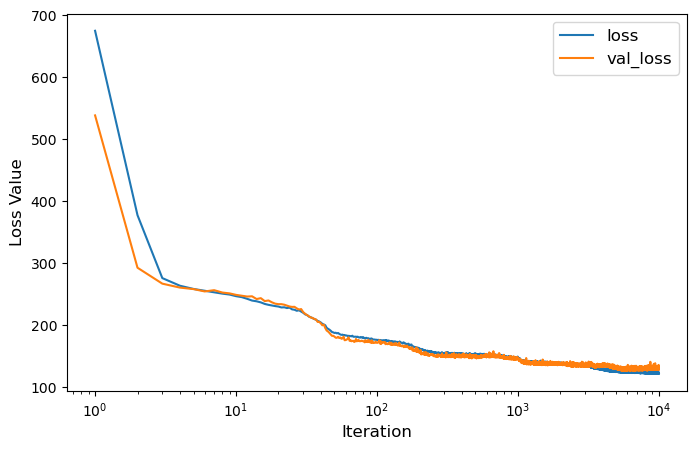

In [24]:
plt.figure(figsize=(8,5),dpi=100)
plt.semilogx(iteration, loss, linewidth=1.5, label='loss')
plt.semilogx(iteration, val_loss, linewidth=1.5, label='val_loss')
plt.xlabel('Iteration',fontsize=12)
plt.ylabel('Loss Value',fontsize=12)
plt.legend(loc=1,fontsize=12)

### Evaluation on Test Data

In [19]:
y_pred = ann.predict(X_test)

Text(0, 0.5, 'Predicted value')

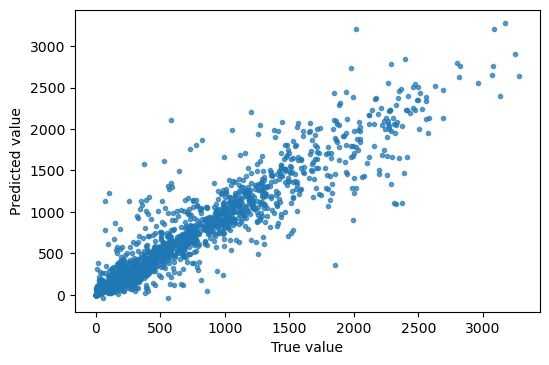

In [20]:
plt.figure(figsize=(6,4),dpi=100)
plt.plot(y_test.values,y_pred,'o',markersize=3,alpha=0.7)
plt.xlabel('True value')
plt.ylabel('Predicted value')

Text(0, 0.5, 'Probability Distribution')

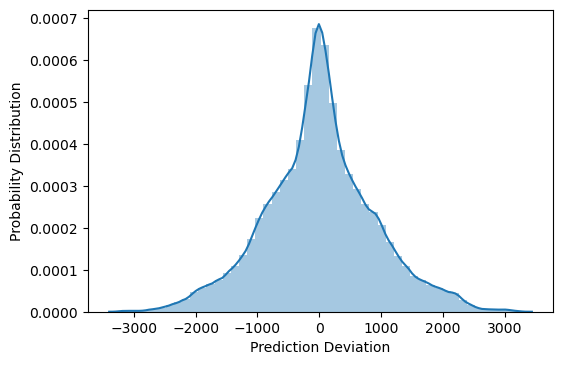

In [21]:
plt.figure(figsize=(6,4),dpi=100)
sns.distplot(y_test.values-y_pred)
plt.xlabel('Prediction Deviation')
plt.ylabel('Probability Distribution')

In [22]:
from sklearn.metrics import explained_variance_score, r2_score

metric = {'value':[]}

# explained variance
exp_var = round(explained_variance_score(y_test,y_pred),3)
metric['value'].append(exp_var)

# R^2_score
r2 = round(r2_score(y_test,y_pred),3)
metric['value'].append(r2)

df_metric = pd.DataFrame(index=['explained_variance','R_squared'],
                         data=metric,
                         columns=['value'])

In [23]:
df_metric

,value
explained_variance,0.871
R_squared,0.871
